In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

C:\Users\H P\AppData\Roaming\Python\Python310\site-packages\pandas\core\arrays\masked.py:60: UserWarning: Pandas requires version '1.3.6' or newer of 'bottleneck' (version '1.3.5' currently installed).
  from pandas.core import (


In [2]:
df = pd.read_csv('cleaned_result_iforest.csv')
df.head()

Unnamed: 0      period  PAPR_NONOPEC  PAPR_OPEC  PATC_OECD  PATC_NON_OECD  \
0           0  2000-01-01     47.662093  28.008193  47.226772      28.286122   
1           1  2000-02-01     47.582217  28.671193  50.229341      28.770679   
2           2  2000-03-01     47.696975  28.605599  49.358083      28.528547   
3           3  2000-04-01     56.526595  29.552483  46.286749      43.578956   
4           4  2000-05-01     47.383670  30.081687  47.338795      28.216862   

    COPRPUS  CORIPUS  PASC_OECD_T3  COPS_OPEC  ...  \
0  5.784376   13.779   2709.462514   5.984101  ...   
1  5.851839   14.028   2709.462514   5.321119  ...   
2  5.918207   14.613   2709.462514   5.387853  ...   
3  5.854166   15.053   2709.462514   4.469957  ...   
4  5.846510   15.494   2709.462514   3.948044  ...   

   Political Stability Index LCA  Political Stability Index LBY  \
0                         1.2236                      -0.294287   
1                         1.2236                      -0.294287   
2                         1.2236                      -0.294287   
3                         1.2236                      -0.294287   
4                         1.2236                      -0.294287   

   Political Stability Index MYS  Political Stability Index SYR  \
0                       0.092691                      -0.180451   
1                       0.092691                      -0.180451   
2                       0.092691                      -0.180451   
3                       0.092691                      -0.180451   
4                       0.092691                      -0.180451   

   Political Stability Index SDN  Political Stability Index TKM  \
0                      -2.244173                       0.008447   
1                      -2.244173                       0.008447   
2                      -2.244173                       0.008447   
3                      -2.244173                       0.008447   
4                      -2.244173                       0.008447   

   Political Stability Index TTO  Political Stability Index TUN  \
0                       0.153456                       0.321115   
1                       0.153456                       0.321115   
2                       0.153456                       0.321115   
3                       0.153456                       0.321115   
4                       0.153456                       0.321115   

   Political Stability Index UZB  Political Stability Index YEM  
0                       -1.30195                      -1.145441  
1                       -1.30195                      -1.145441  
2                       -1.30195                      -1.145441  
3                       -1.30195                      -1.145441  
4                       -1.30195                      -1.145441  

[5 rows x 57 columns]

In [3]:
df.drop('Unnamed: 0', axis=1,  inplace=True)

In [4]:
df.columns

Index(['period', 'PAPR_NONOPEC', 'PAPR_OPEC', 'PATC_OECD', 'PATC_NON_OECD',
       'COPRPUS', 'CORIPUS', 'PASC_OECD_T3', 'COPS_OPEC', 'COPC_OPEC',
       'T3_STCHANGE_OOECD', 'T3_STCHANGE_NOECD', 'WTISPLC', 'Global Inflation',
       'U.S. Unemployment', 'U.S. Interest Rate', 'EU Unemployment',
       'EU Interest Rate', 'Current Account Balance',
       'Gross Domestic Product, Current Prices',
       'Political Stability Index IRN', 'Political Stability Index IRQ',
       'Political Stability Index KWT', 'Political Stability Index QAT',
       'Political Stability Index SAU', 'Political Stability Index ARE',
       'Political Stability Index USA', 'Political Stability Index RUS',
       'Political Stability Index CAN', 'Political Stability Index CHN',
       'Political Stability Index MEX', 'Political Stability Index VEN',
       'Political Stability Index BRA', 'Political Stability Index NGA',
       'Political Stability Index NLD', 'Political Stability Index NOR',
       'Political

In [ ]:
import os

dir_name = 'time-series_plots'

if not os.path.exists(dir_name):
    os.makedirs(dir_name)
    print(f"Directory '{dir_name}' created")
else:
    print(f"Directory '{dir_name}' already exists")

#### Political Stability Index of different countries

In [5]:
pol_stability_countries = [
    'Political Stability Index IRN', 'Political Stability Index IRQ',
    'Political Stability Index KWT', 'Political Stability Index QAT',
    'Political Stability Index SAU', 'Political Stability Index ARE',
    'Political Stability Index USA', 'Political Stability Index RUS',
    'Political Stability Index CAN', 'Political Stability Index CHN',
    'Political Stability Index MEX', 'Political Stability Index VEN',
    'Political Stability Index BRA', 'Political Stability Index NGA',
    'Political Stability Index NLD', 'Political Stability Index NOR',
    'Political Stability Index KAZ', 'Political Stability Index AGO',
    'Political Stability Index DZA', 'Political Stability Index COL',
    'Political Stability Index GAB', 'Political Stability Index OMN',
    'Political Stability Index EGY', 'Political Stability Index GNQ',
    'Political Stability Index LBR', 'Political Stability Index LBN',
    'Political Stability Index LCA', 'Political Stability Index LBY',
    'Political Stability Index MYS', 'Political Stability Index SYR',
    'Political Stability Index SDN', 'Political Stability Index TKM',
    'Political Stability Index TTO', 'Political Stability Index TUN',
    'Political Stability Index UZB', 'Political Stability Index YEM'
]

df['year'] = pd.to_datetime(df['period']).dt.year

# Melt the dataFrame
df_melted = df.melt(id_vars=['year'], value_vars=pol_stability_countries,
                    var_name='Country', value_name='Stability Index')

In [6]:
oecd_countries = ['CAN', 'MEX', 'NLD', 'NOR', 'USA']
non_oecd_countries = ['DZA', 'AGO', 'BRA', 'CHN', 'COL', 'EGY', 'GNQ', 'GAB', 'IRN', 'IRQ', 'KAZ', 'KWT', 'LBR', 'LBN', 'LBY', 'MYS', 'NGA', 'OMN', 'QAT', 'RUS', 'LCA', 'SAU', 'SDN', 'SYR', 'TTO', 'TUN', 'TKM', 'ARE', 'UZB', 'VEN', 'YEM']

opec_countries = ['DZA', 'AGO', 'GNQ', 'GAB', 'IRN', 'IRQ', 'KWT', 'LBY', 'NGA', 'QAT', 'SAU', 'ARE', 'VEN']
non_opec_countries = list(set(non_oecd_countries) - set(opec_countries))

In [7]:
# Add 'Political Stability Index ' before the country code
for i in range(len(oecd_countries)):
    oecd_countries[i] = 'Political Stability Index ' + oecd_countries[i]

for i in range(len(non_oecd_countries)):
    non_oecd_countries[i] = 'Political Stability Index ' + non_oecd_countries[i]

for i in range(len(opec_countries)):
    opec_countries[i] = 'Political Stability Index ' + opec_countries[i]

for i in range(len(non_opec_countries)):
    non_opec_countries[i] = 'Political Stability Index ' + non_opec_countries[i]

In [8]:
df_melted_oecd = df.melt(id_vars=['year'], value_vars=oecd_countries,
                    var_name='Country', value_name='Stability Index')

df_melted_non_oecd = df.melt(id_vars=['year'], value_vars=non_oecd_countries,
                    var_name='Country', value_name='Stability Index')

df_melted_opec = df.melt(id_vars=['year'], value_vars=opec_countries,
                    var_name='Country', value_name='Stability Index')

df_melted_non_opec = df.melt(id_vars=['year'], value_vars=non_opec_countries,
                    var_name='Country', value_name='Stability Index')

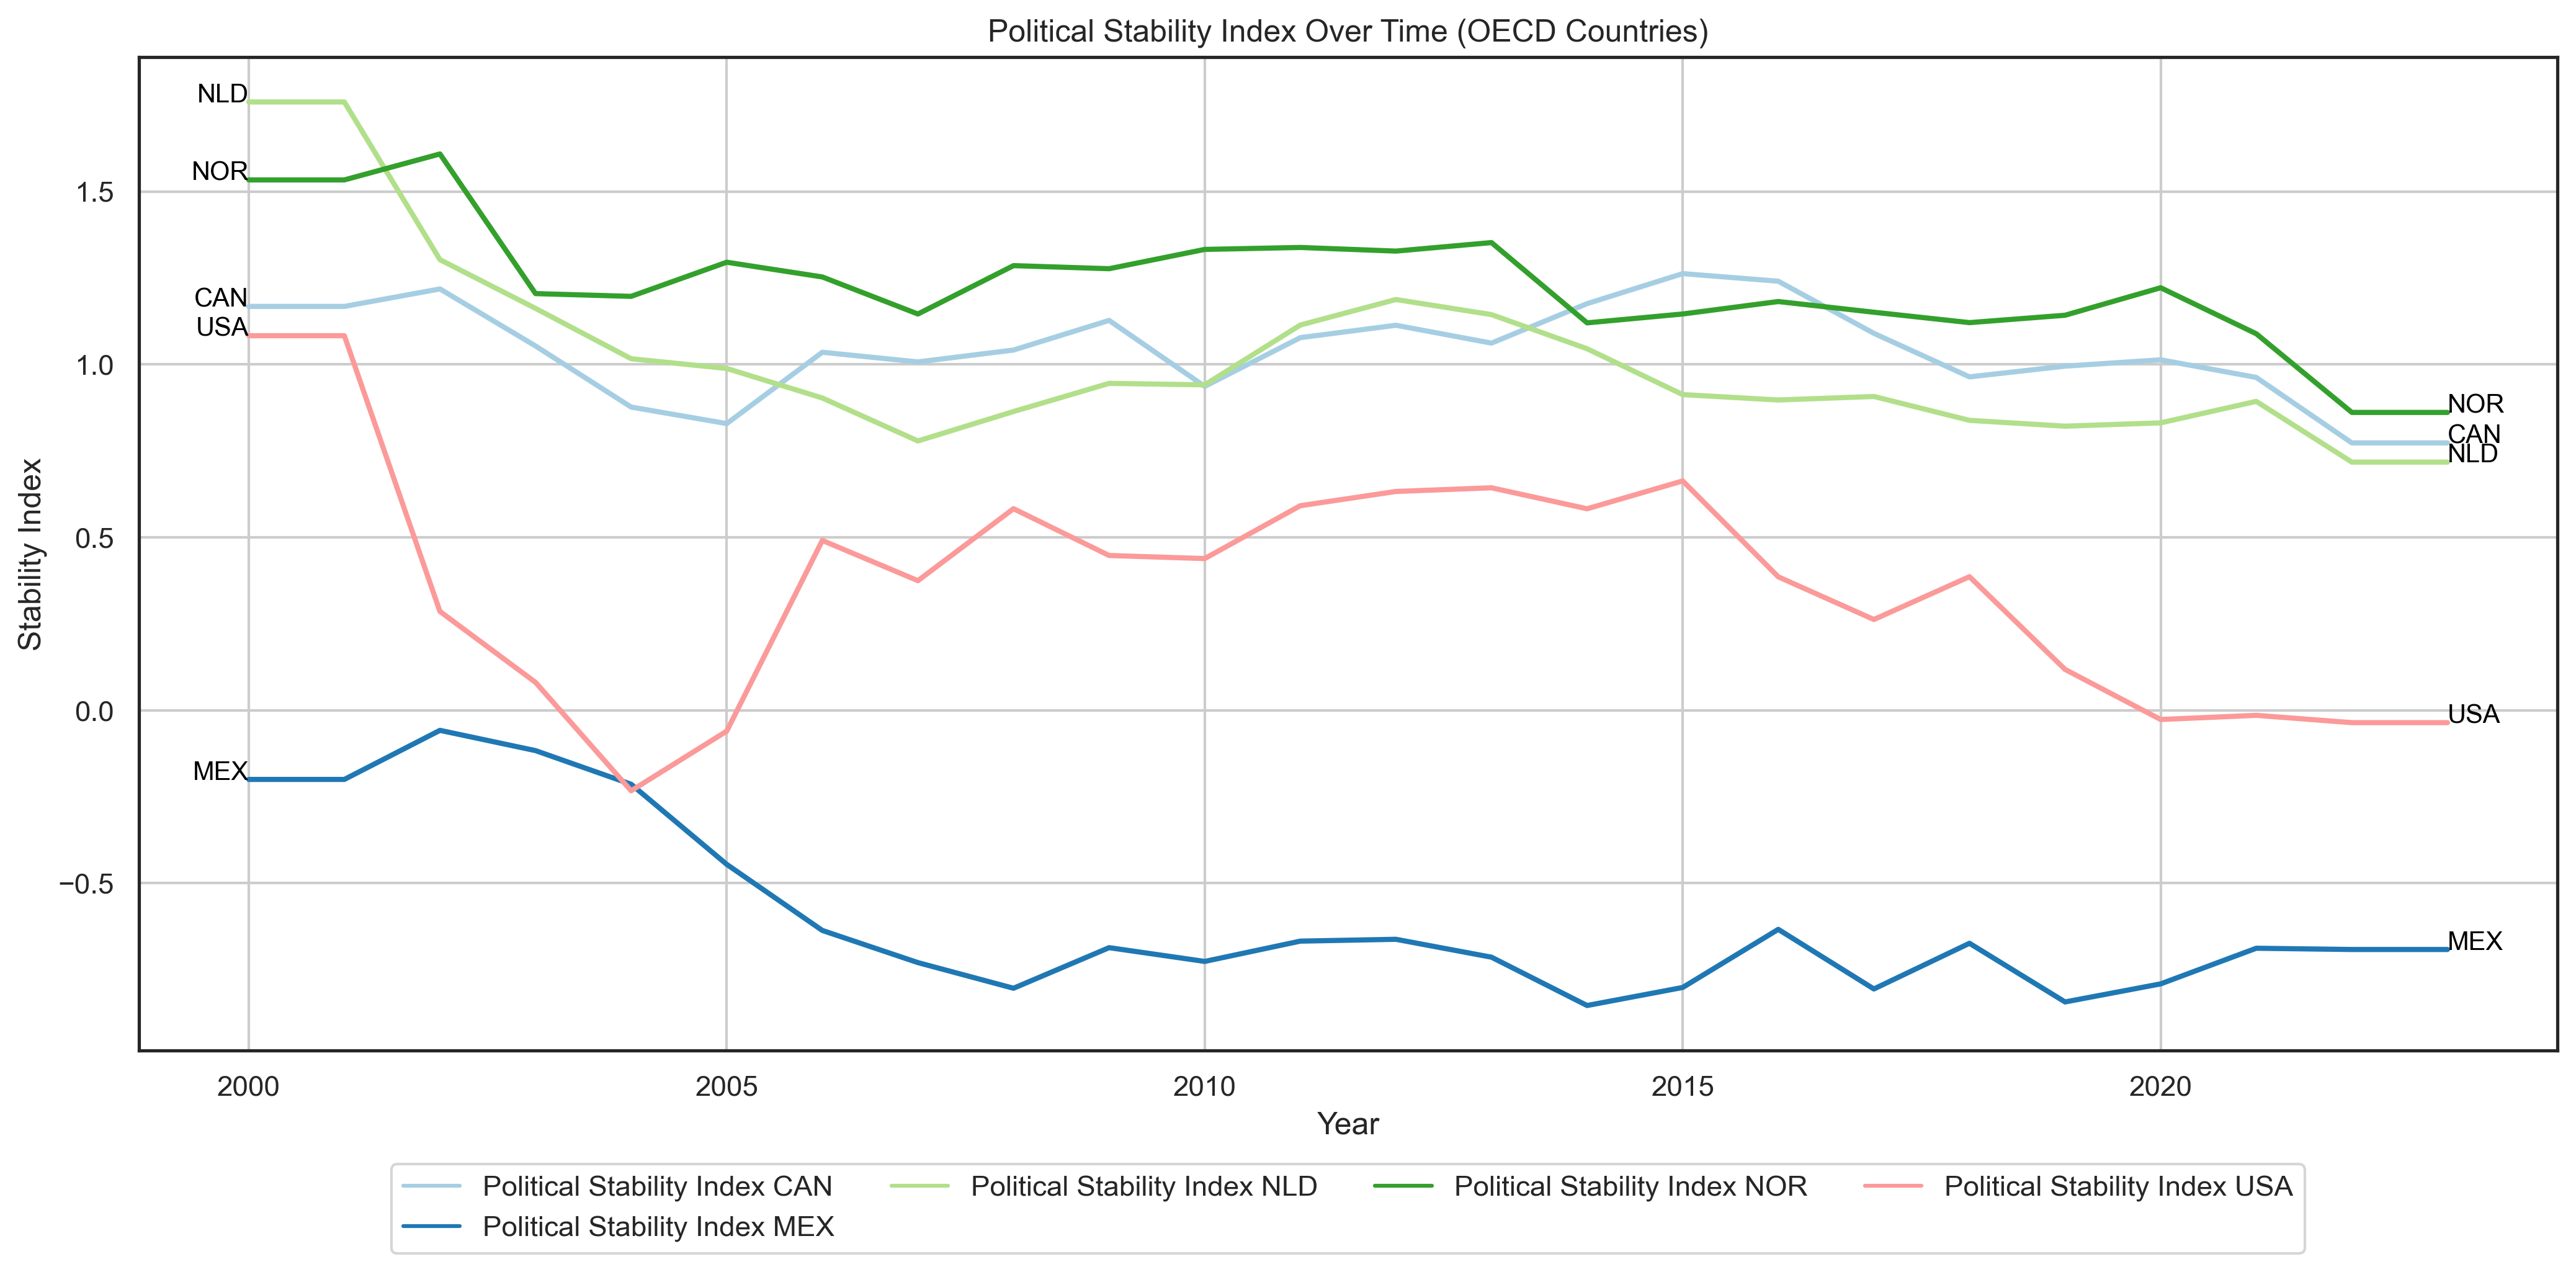

In [70]:
sns.set_theme(style='white')

plt.figure(figsize=(14, 7), dpi=300)
sns.lineplot(data=df_melted_oecd, x='year', y='Stability Index', hue='Country', palette='Paired', linewidth=2)

for country in df_melted_oecd['Country'].unique():
    country_data = df_melted_oecd[df_melted_oecd['Country'] == country]
    plt.text(country_data['year'].min(), country_data['Stability Index'].iloc[0], country.split()[-1], 
             horizontalalignment='right', size='small', color='black', weight='normal')

for country in df_melted_oecd['Country'].unique():
    country_data = df_melted_oecd[df_melted_oecd['Country'] == country]
    plt.text(country_data['year'].max(), country_data['Stability Index'].iloc[-1], country.split()[-1], 
             horizontalalignment='left', size='small', color='black', weight='normal')
    
plt.title('Political Stability Index Over Time (OECD Countries)')
plt.xlabel('Year')
plt.ylabel('Stability Index')
plt.legend(bbox_to_anchor=(0.5, -0.1), loc='upper center', ncol=4)
plt.tight_layout()
plt.grid()
plt.savefig('time-series_plots/political-stability-index-over-time_oecd-countries.png', bbox_inches='tight')
plt.show()

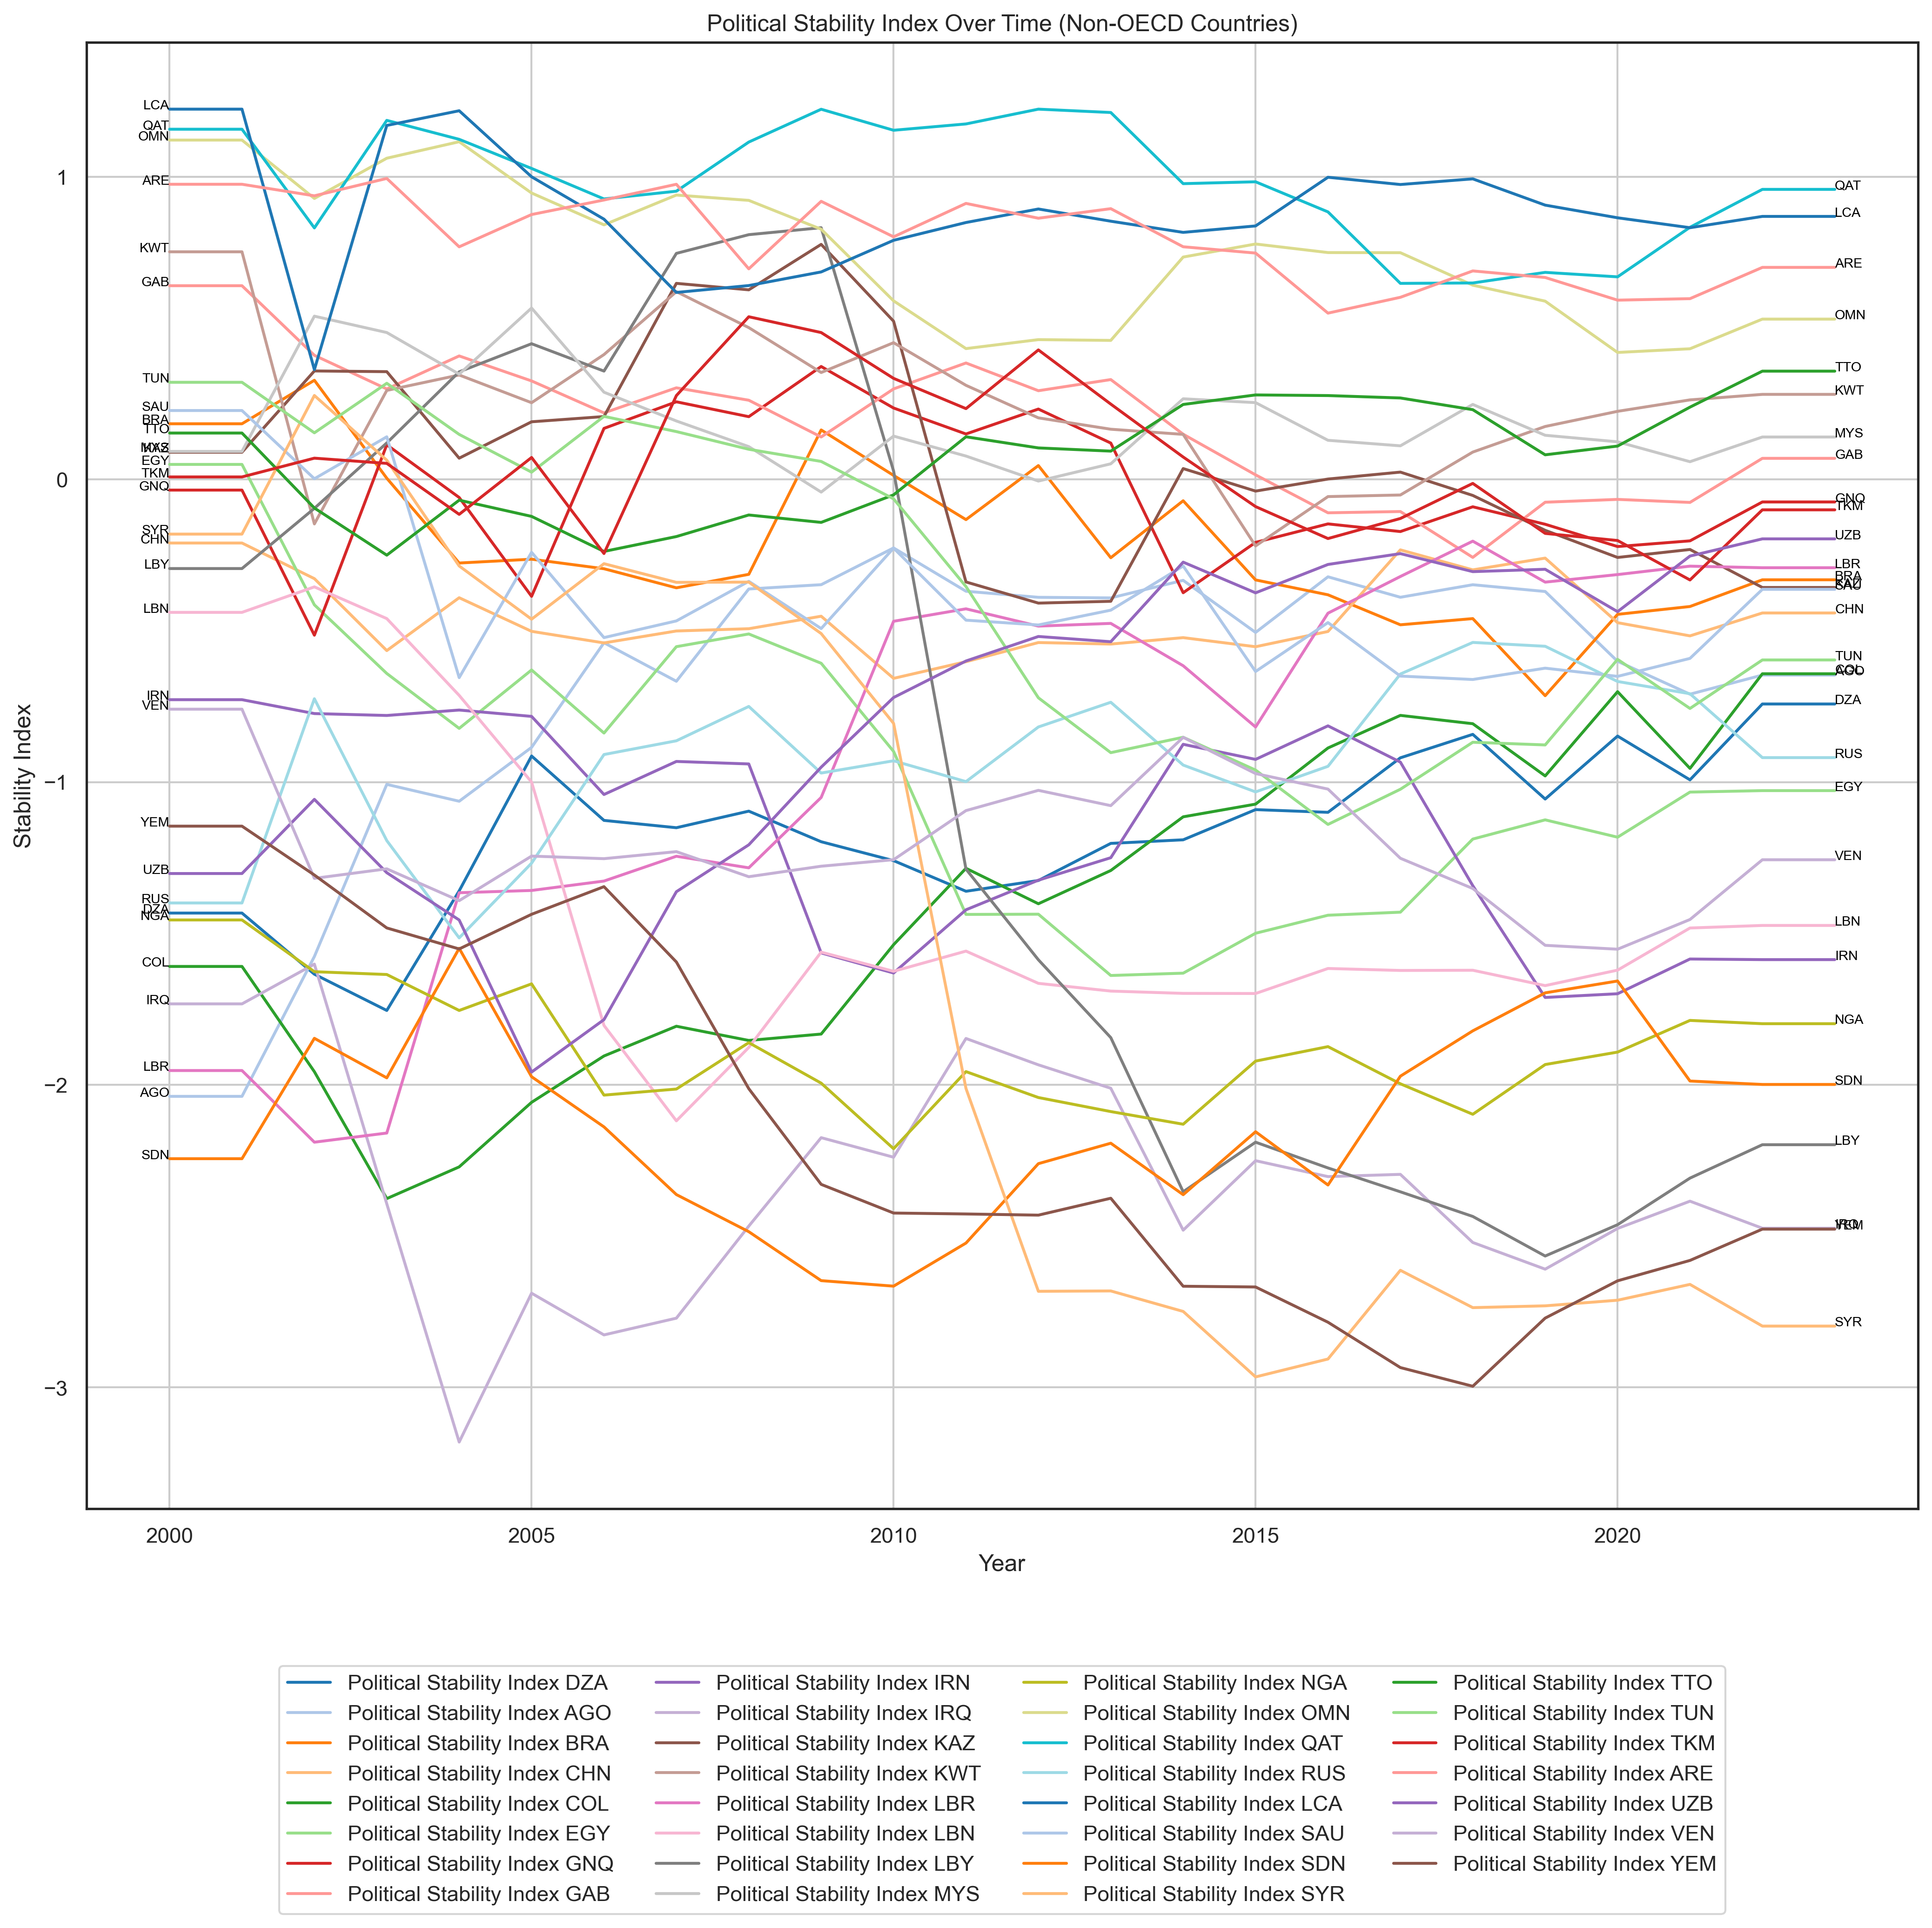

In [62]:
sns.set_theme(style='white')

plt.figure(figsize=(14, 14), dpi=300)
sns.lineplot(data=df_melted_non_oecd, x='year', y='Stability Index', hue='Country', palette='tab20')

for country in df_melted_non_oecd['Country'].unique():
    country_data = df_melted_non_oecd[df_melted_non_oecd['Country'] == country]
    plt.text(country_data['year'].min(), country_data['Stability Index'].iloc[0], country.split()[-1], 
             horizontalalignment='right', size='xx-small', color='black', weight='normal')

for country in df_melted_non_oecd['Country'].unique():
    country_data = df_melted_non_oecd[df_melted_non_oecd['Country'] == country]
    plt.text(country_data['year'].max(), country_data['Stability Index'].iloc[-1], country.split()[-1], 
             horizontalalignment='left', size='xx-small', color='black', weight='normal')

plt.title('Political Stability Index Over Time (Non-OECD Countries)')
plt.xlabel('Year')
plt.ylabel('Stability Index')
plt.legend(bbox_to_anchor=(0.5, -0.1), loc='upper center', ncol=4)
plt.tight_layout()
plt.grid()
plt.savefig('time-series_plots/political-stability-index-over-time_non-oecd-countries.png', bbox_inches='tight')
plt.show()

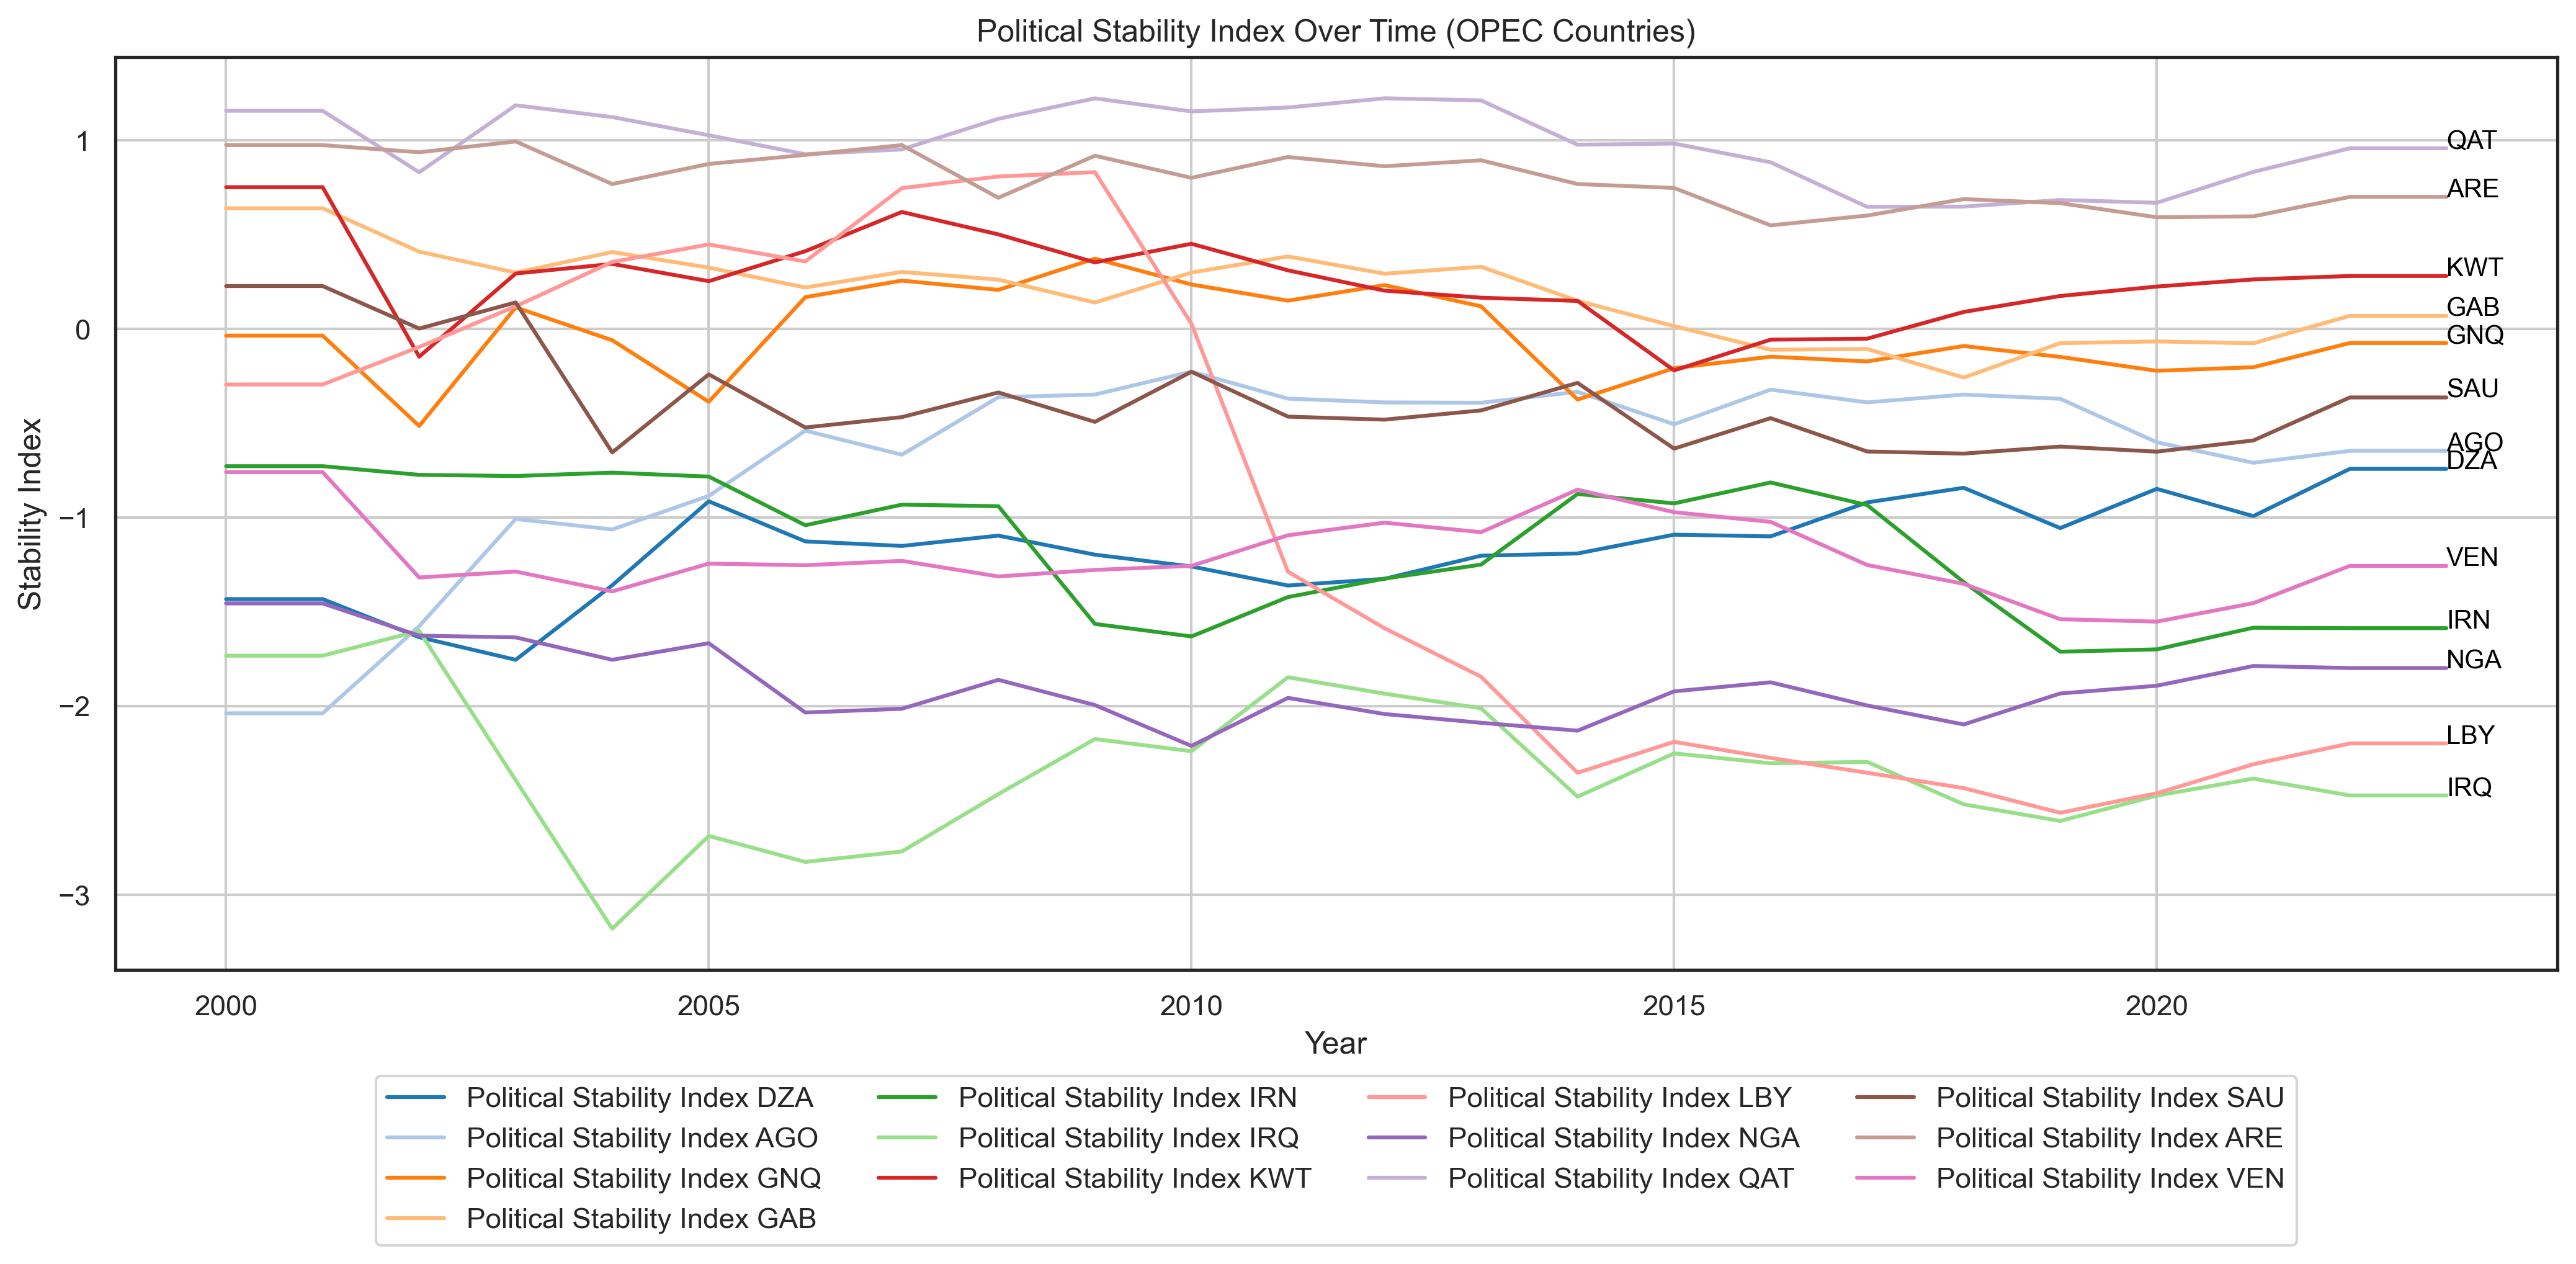

In [77]:
sns.set_theme(style='white')

plt.figure(figsize=(14, 7), dpi=300)
sns.lineplot(data=df_melted_opec, x='year', y='Stability Index', hue='Country', palette='tab20')

for country in df_melted_opec['Country'].unique():
    country_data = df_melted_opec[df_melted_opec['Country'] == country]
    plt.text(country_data['year'].max(), country_data['Stability Index'].iloc[-1], country.split()[-1], 
             horizontalalignment='left', size='small', color='black', weight='normal')
    
plt.title('Political Stability Index Over Time (OPEC Countries)')
plt.xlabel('Year')
plt.ylabel('Stability Index')
plt.legend(bbox_to_anchor=(0.5, -0.1), loc='upper center', ncol=4)
plt.tight_layout()
plt.grid()
plt.savefig('time-series_plots/political-stability-index-over-time_opec-countries.png', bbox_inches='tight')
plt.show()

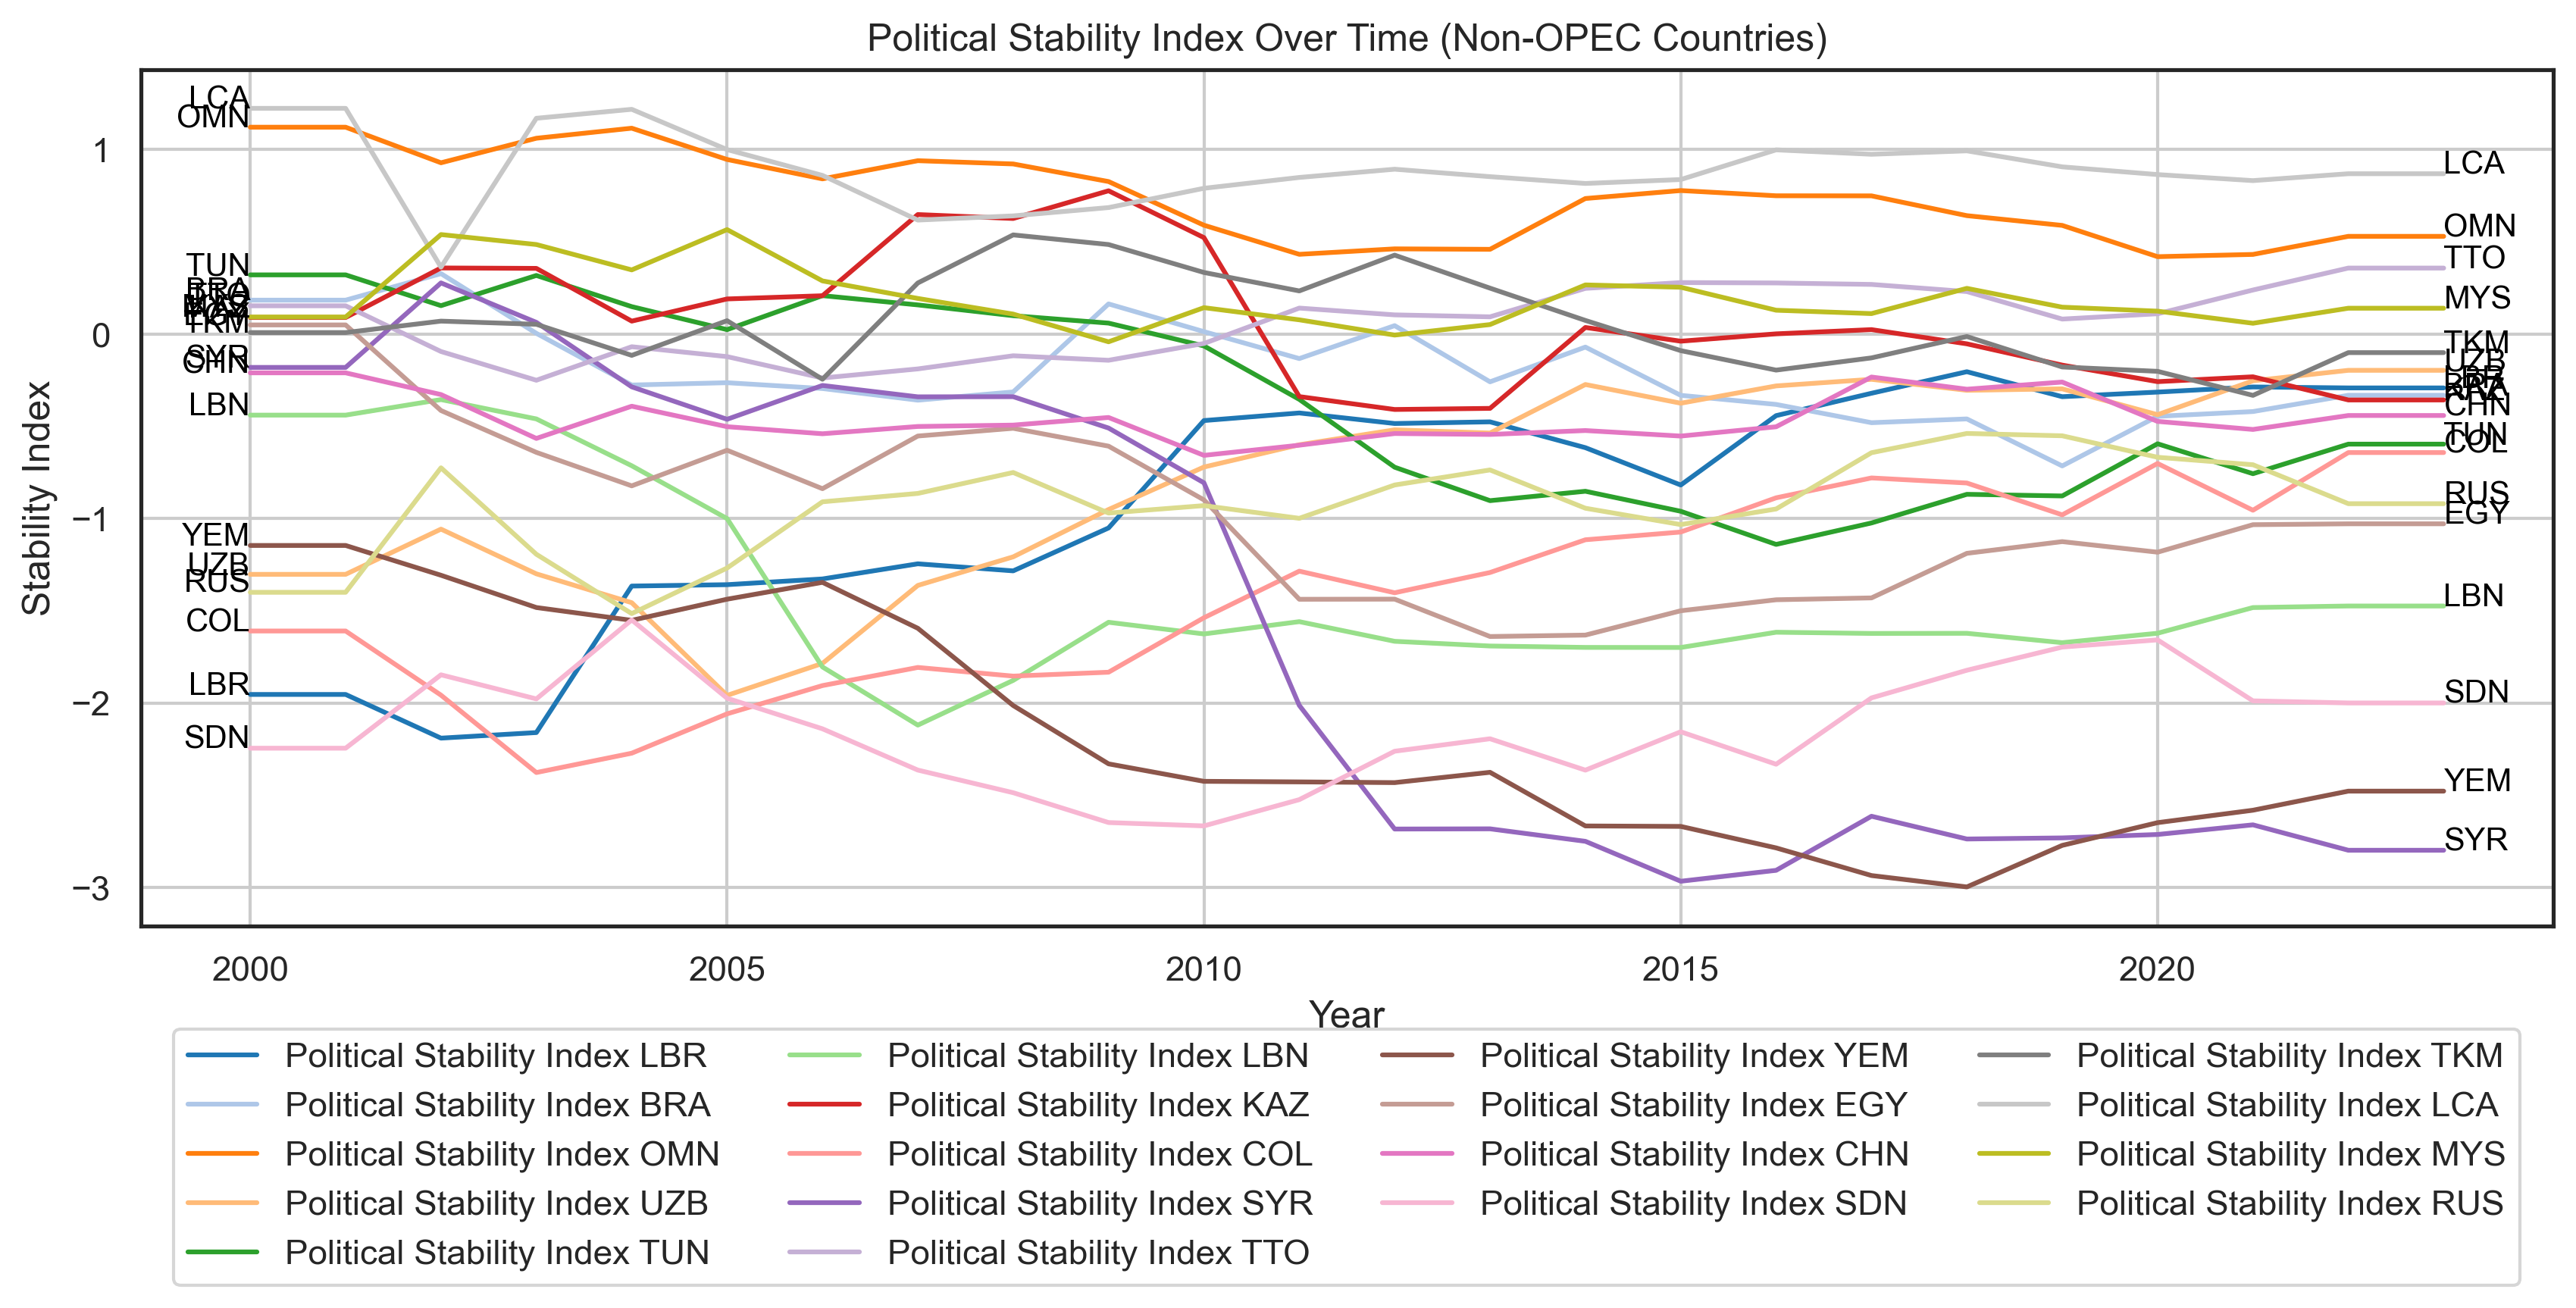

In [88]:
sns.set_theme(style='white')

plt.figure(figsize=(14, 7), dpi=300)
sns.lineplot(data=df_melted_non_opec, x='year', y='Stability Index', hue='Country', palette='tab20')

for country in df_melted_non_opec['Country'].unique():
    country_data = df_melted_non_opec[df_melted_non_opec['Country'] == country]
    plt.text(country_data['year'].min(), country_data['Stability Index'].iloc[0], country.split()[-1], 
             horizontalalignment='right', size='small', color='black', weight='normal')

for country in df_melted_non_opec['Country'].unique():
    country_data = df_melted_non_opec[df_melted_non_opec['Country'] == country]
    plt.text(country_data['year'].max(), country_data['Stability Index'].iloc[-1], country.split()[-1], 
             horizontalalignment='left', size='small', color='black', weight='normal')
    
plt.title('Political Stability Index Over Time (Non-OPEC Countries)')
plt.xlabel('Year')
plt.ylabel('Stability Index')
plt.legend(bbox_to_anchor=(0.5, -0.1), loc='upper center', ncol=4)
plt.tight_layout()
plt.grid()
plt.savefig('time-series_plots/political-stability-index-over-time_non-opec-countries.png', bbox_inches='tight')
plt.show()

#### Unemployment

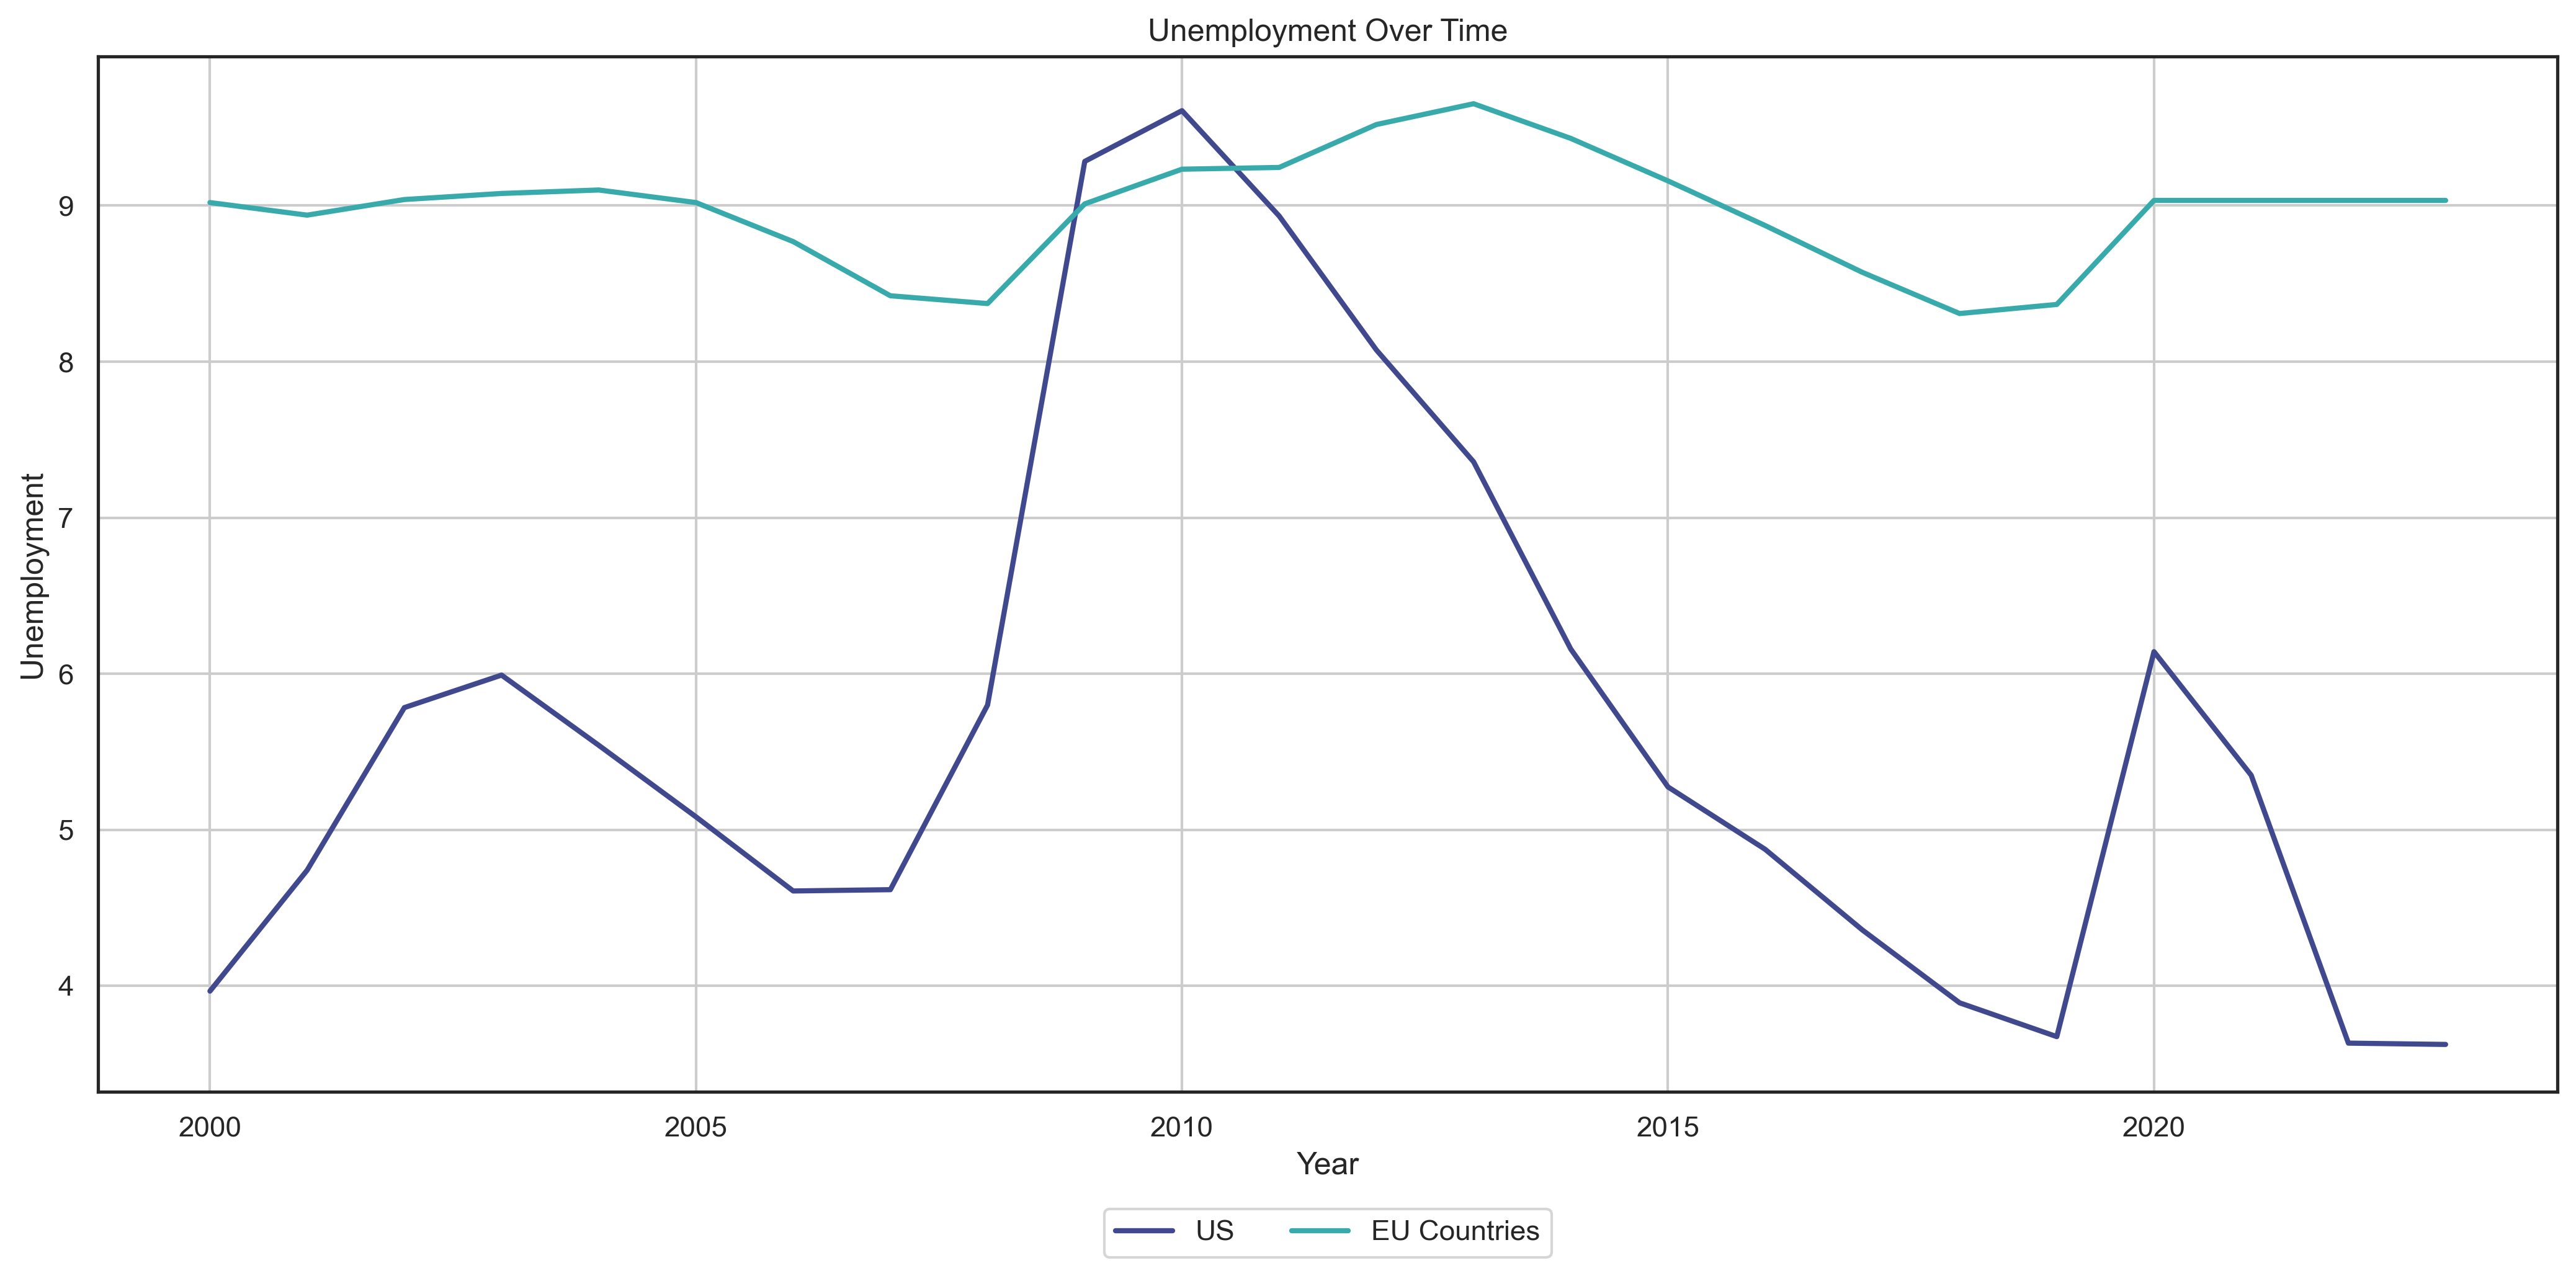

In [69]:
unemployment_col =['U.S. Unemployment', 'EU Unemployment']
unemployment_data = df.melt(id_vars=['year'], value_vars=unemployment_col,
                    var_name='Country', value_name='Unemployment_Value')

sns.set_theme(style='white')

plt.figure(figsize=(14, 7), dpi=300)
sns.lineplot(data=unemployment_data, x='year', y='Unemployment_Value', hue='Country',
             palette='mako', ci=None, linewidth=2)
    
plt.title('Unemployment Over Time')
plt.xlabel('Year')
plt.ylabel('Unemployment')
plt.legend(bbox_to_anchor=(0.5, -0.1), loc='upper center', ncol=4, labels=['US', 
                                                                           'EU Countries'])
plt.tight_layout()
plt.grid()
plt.savefig('time-series_plots/unemployment-over-time.png', bbox_inches='tight')
plt.show()

#### Interest Rate

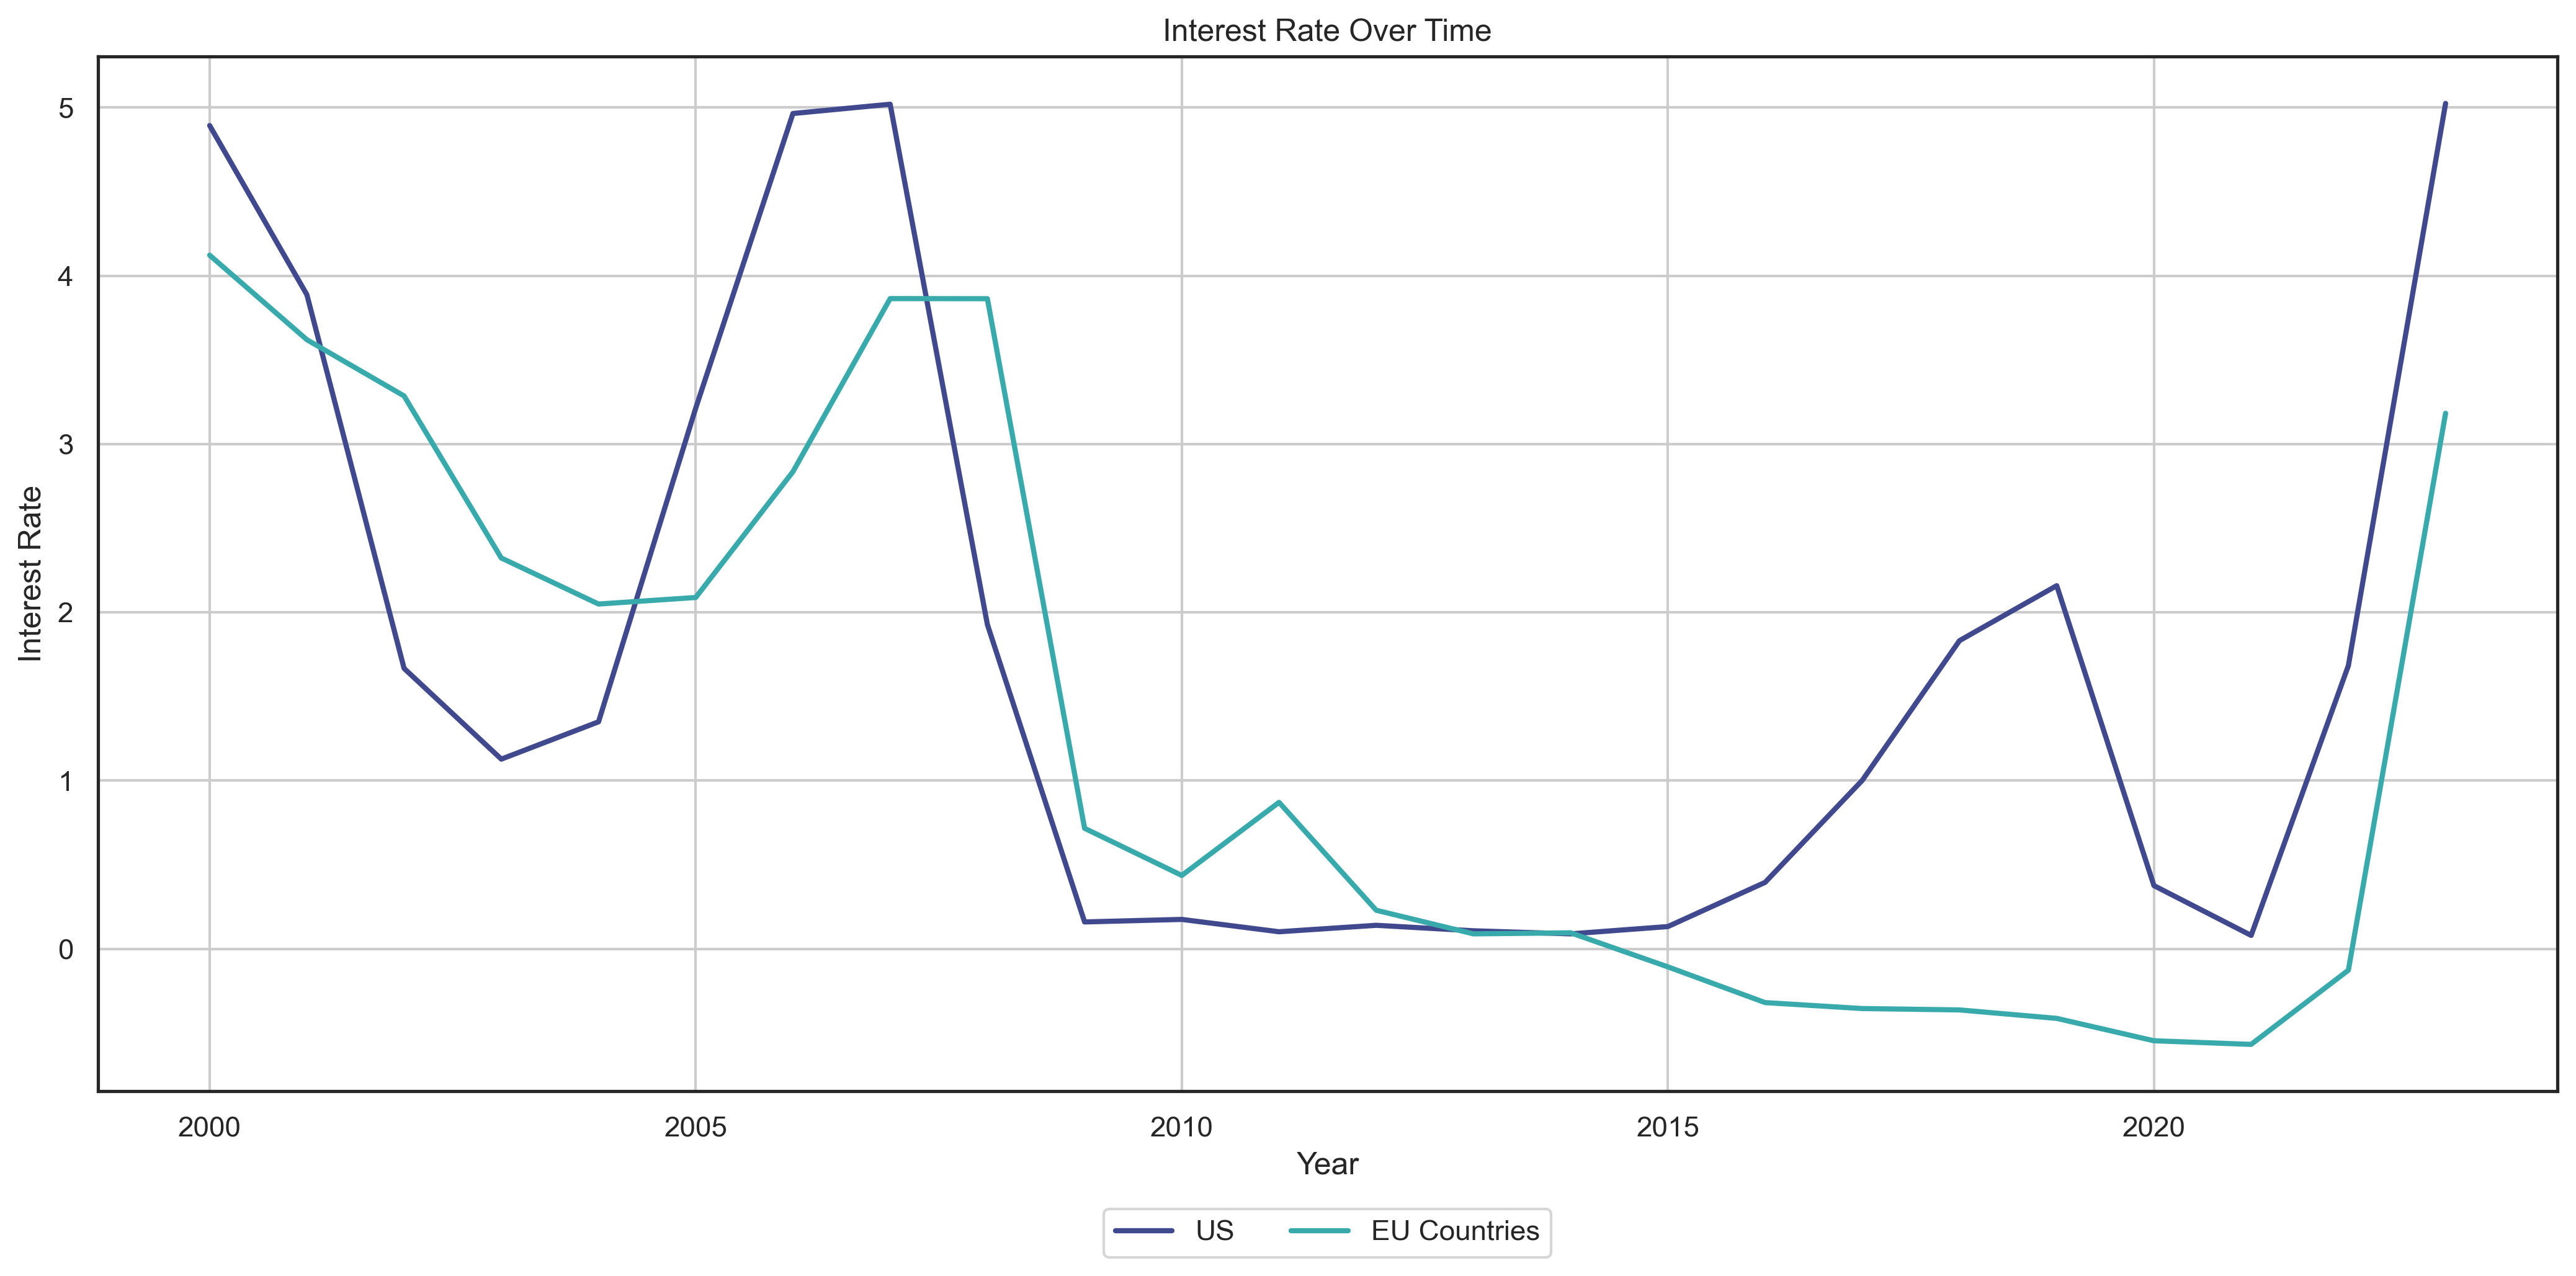

In [68]:
interest_rate_col =['U.S. Interest Rate','EU Interest Rate']
interest_rate_data = df.melt(id_vars=['year'], value_vars=interest_rate_col,
                    var_name='Country', value_name='Interest_Rate_Value')

sns.set_theme(style='white')

plt.figure(figsize=(14, 7), dpi=300)
sns.lineplot(data=interest_rate_data, x='year', y='Interest_Rate_Value', hue='Country',
             palette='mako', ci=None, linewidth=2#### Unemployment)
    
plt.title('Interest Rate Over Time')
plt.xlabel('Year')
plt.ylabel('Interest Rate')
plt.legend(bbox_to_anchor=(0.5, -0.1), loc='upper center', ncol=4, labels=['US', 
                                                                           'EU Countries'])
plt.tight_layout()
plt.grid()
plt.savefig('time-series_plots/interest-rate-over-time.png', bbox_inches='tight')
plt.show()

#### Petroleum Supply

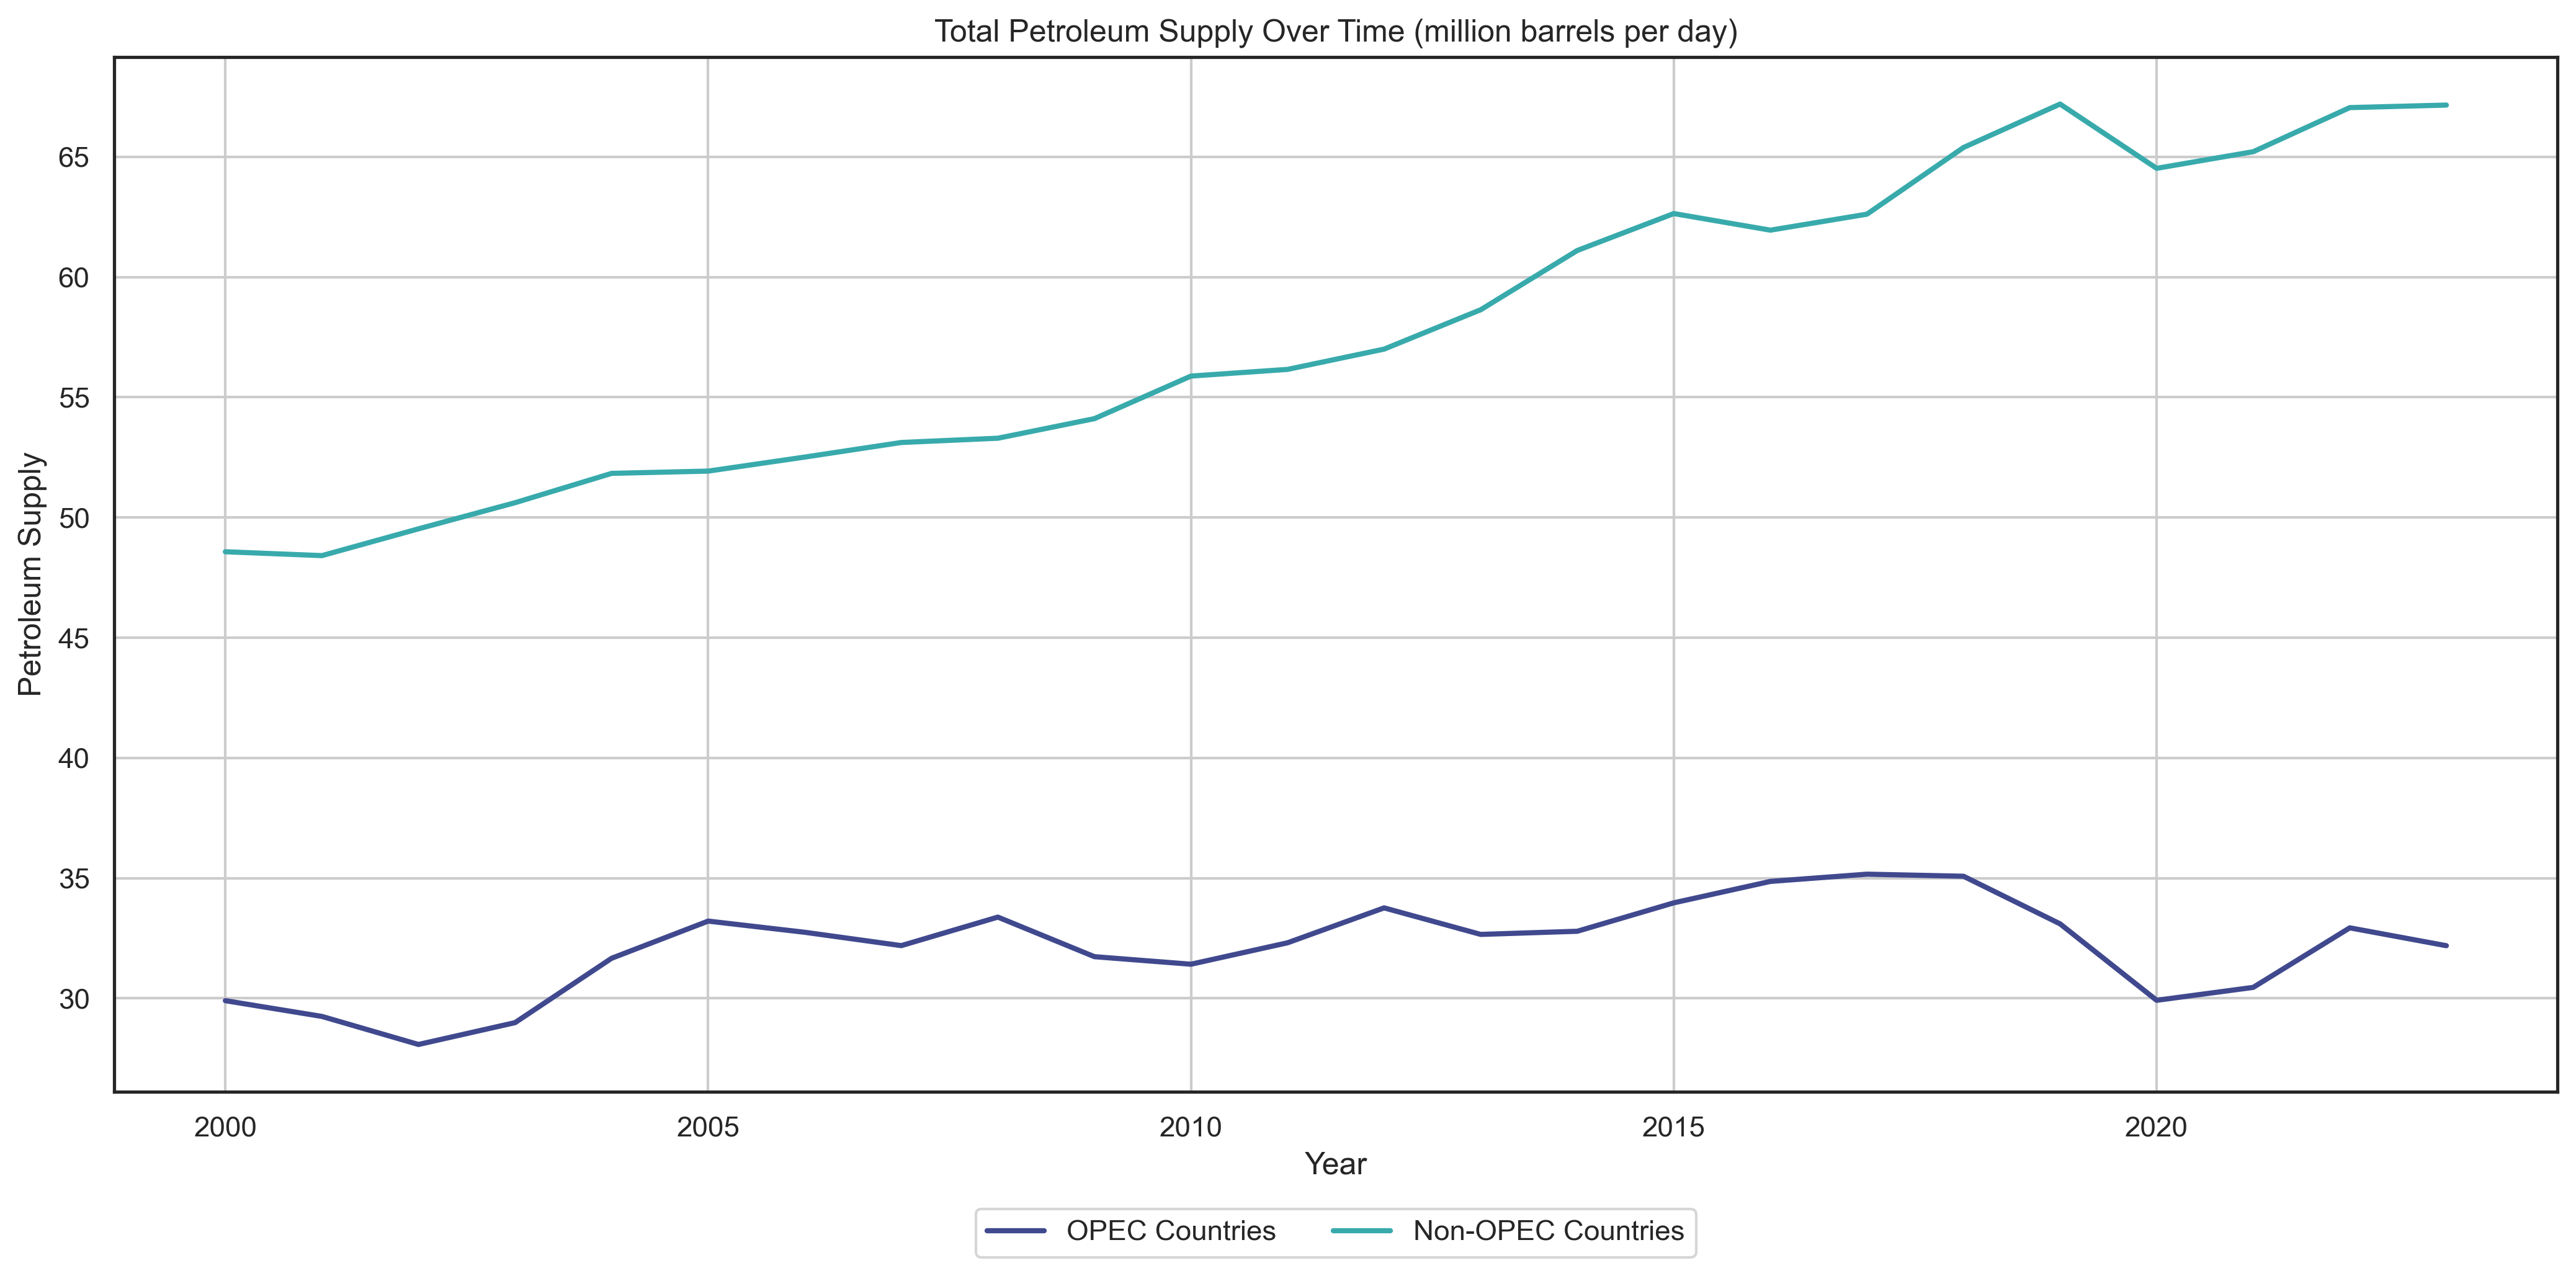

In [67]:
petroleum_supply_df = df.melt(id_vars=['year'], value_vars=['PAPR_OPEC', 'PAPR_NONOPEC'],
        var_name='Country', value_name='Petroleum_Supply')
sns.set_theme(style='white')

plt.figure(figsize=(14, 7), dpi=300)
sns.lineplot(data=petroleum_supply_df, x='year', y='Petroleum_Supply', hue='Country',
             palette='mako', ci=None, linewidth=2)
    
plt.title('Total Petroleum Supply Over Time (million barrels per day)')
plt.xlabel('Year')
plt.ylabel('Petroleum Supply')
plt.legend(bbox_to_anchor=(0.5, -0.1), loc='upper center', ncol=4, labels=['OPEC Countries', 
                                                                           'Non-OPEC Countries'])
plt.tight_layout()
plt.grid()
plt.savefig('time-series_plots/total-petroleum-supply-over-time.png', bbox_inches='tight')
plt.show()

#### Fuel Consumption

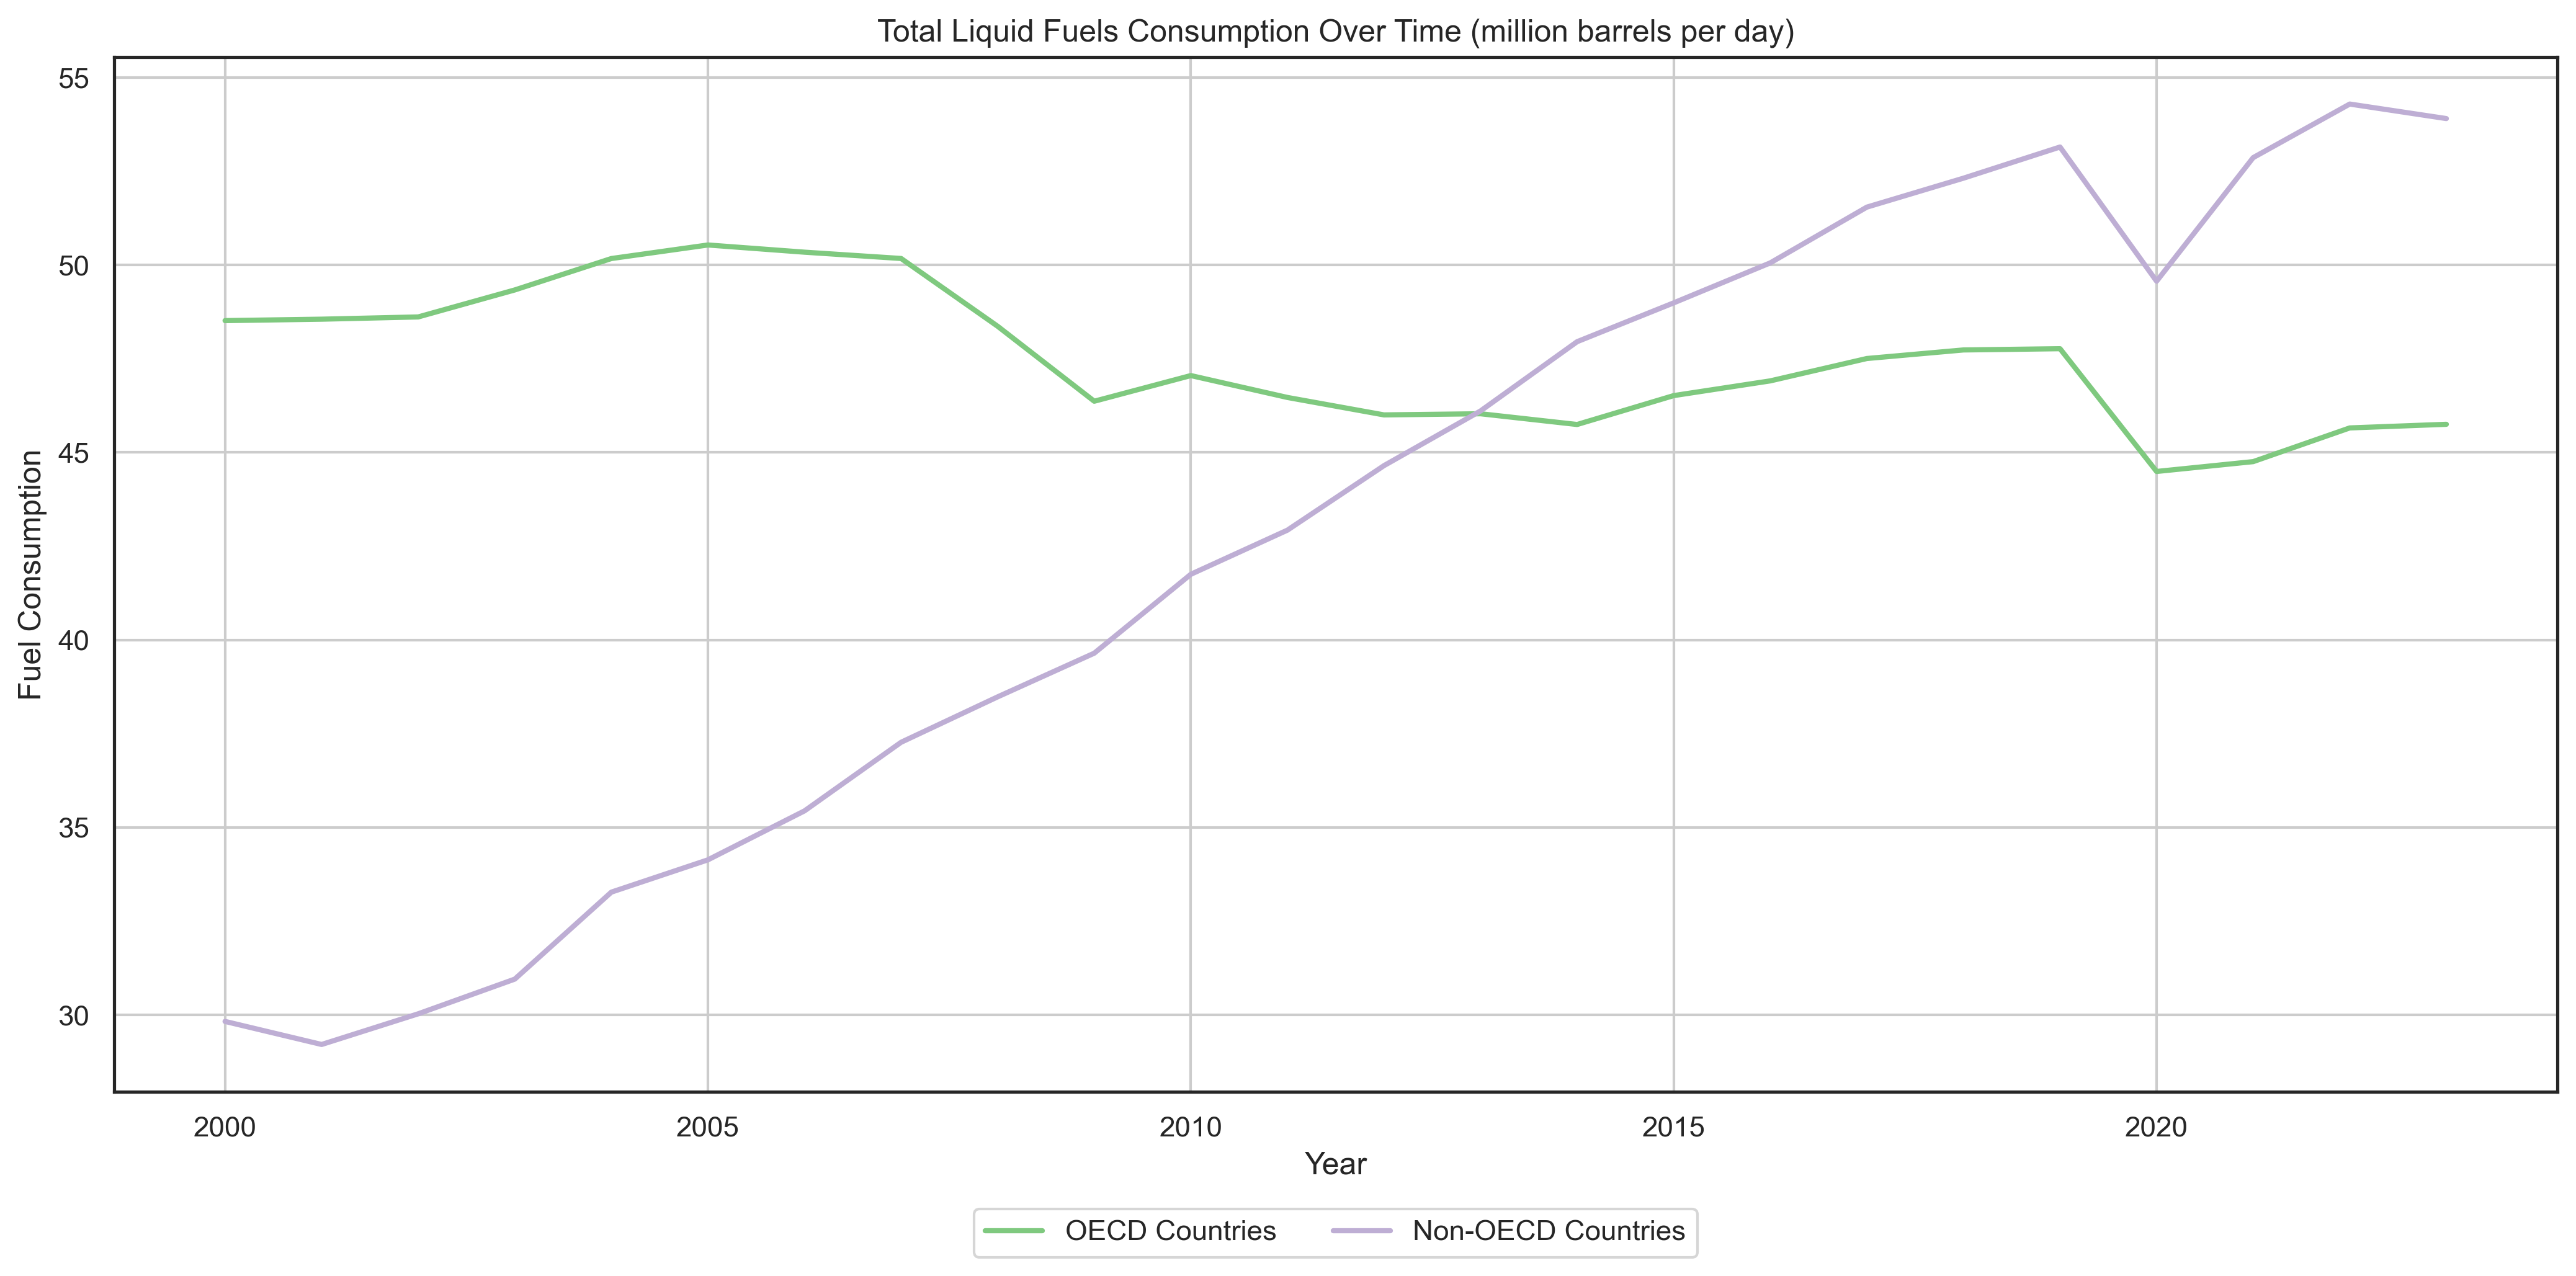

In [66]:
fuels_consumption_df = df.melt(id_vars=['year'], value_vars=['PATC_OECD', 'PATC_NON_OECD'],
        var_name='Country', value_name='fuels_consumption')
sns.set_theme(style='white')

plt.figure(figsize=(14, 7), dpi=300)
sns.lineplot(data=fuels_consumption_df, x='year', y='fuels_consumption', hue='Country',  palette='Accent', ci=None, linewidth=2)
    
plt.title('Total Liquid Fuels Consumption Over Time (million barrels per day)')
plt.xlabel('Year')
plt.ylabel('Fuel Consumption')
plt.legend(bbox_to_anchor=(0.5, -0.1), loc='upper center', ncol=4, labels=['OECD Countries', 
                                                                           'Non-OECD Countries'])
plt.tight_layout()
plt.grid()
plt.savefig('time-series_plots/fuels-consumption-over-time.png', bbox_inches='tight')
plt.show()

#### Inventory

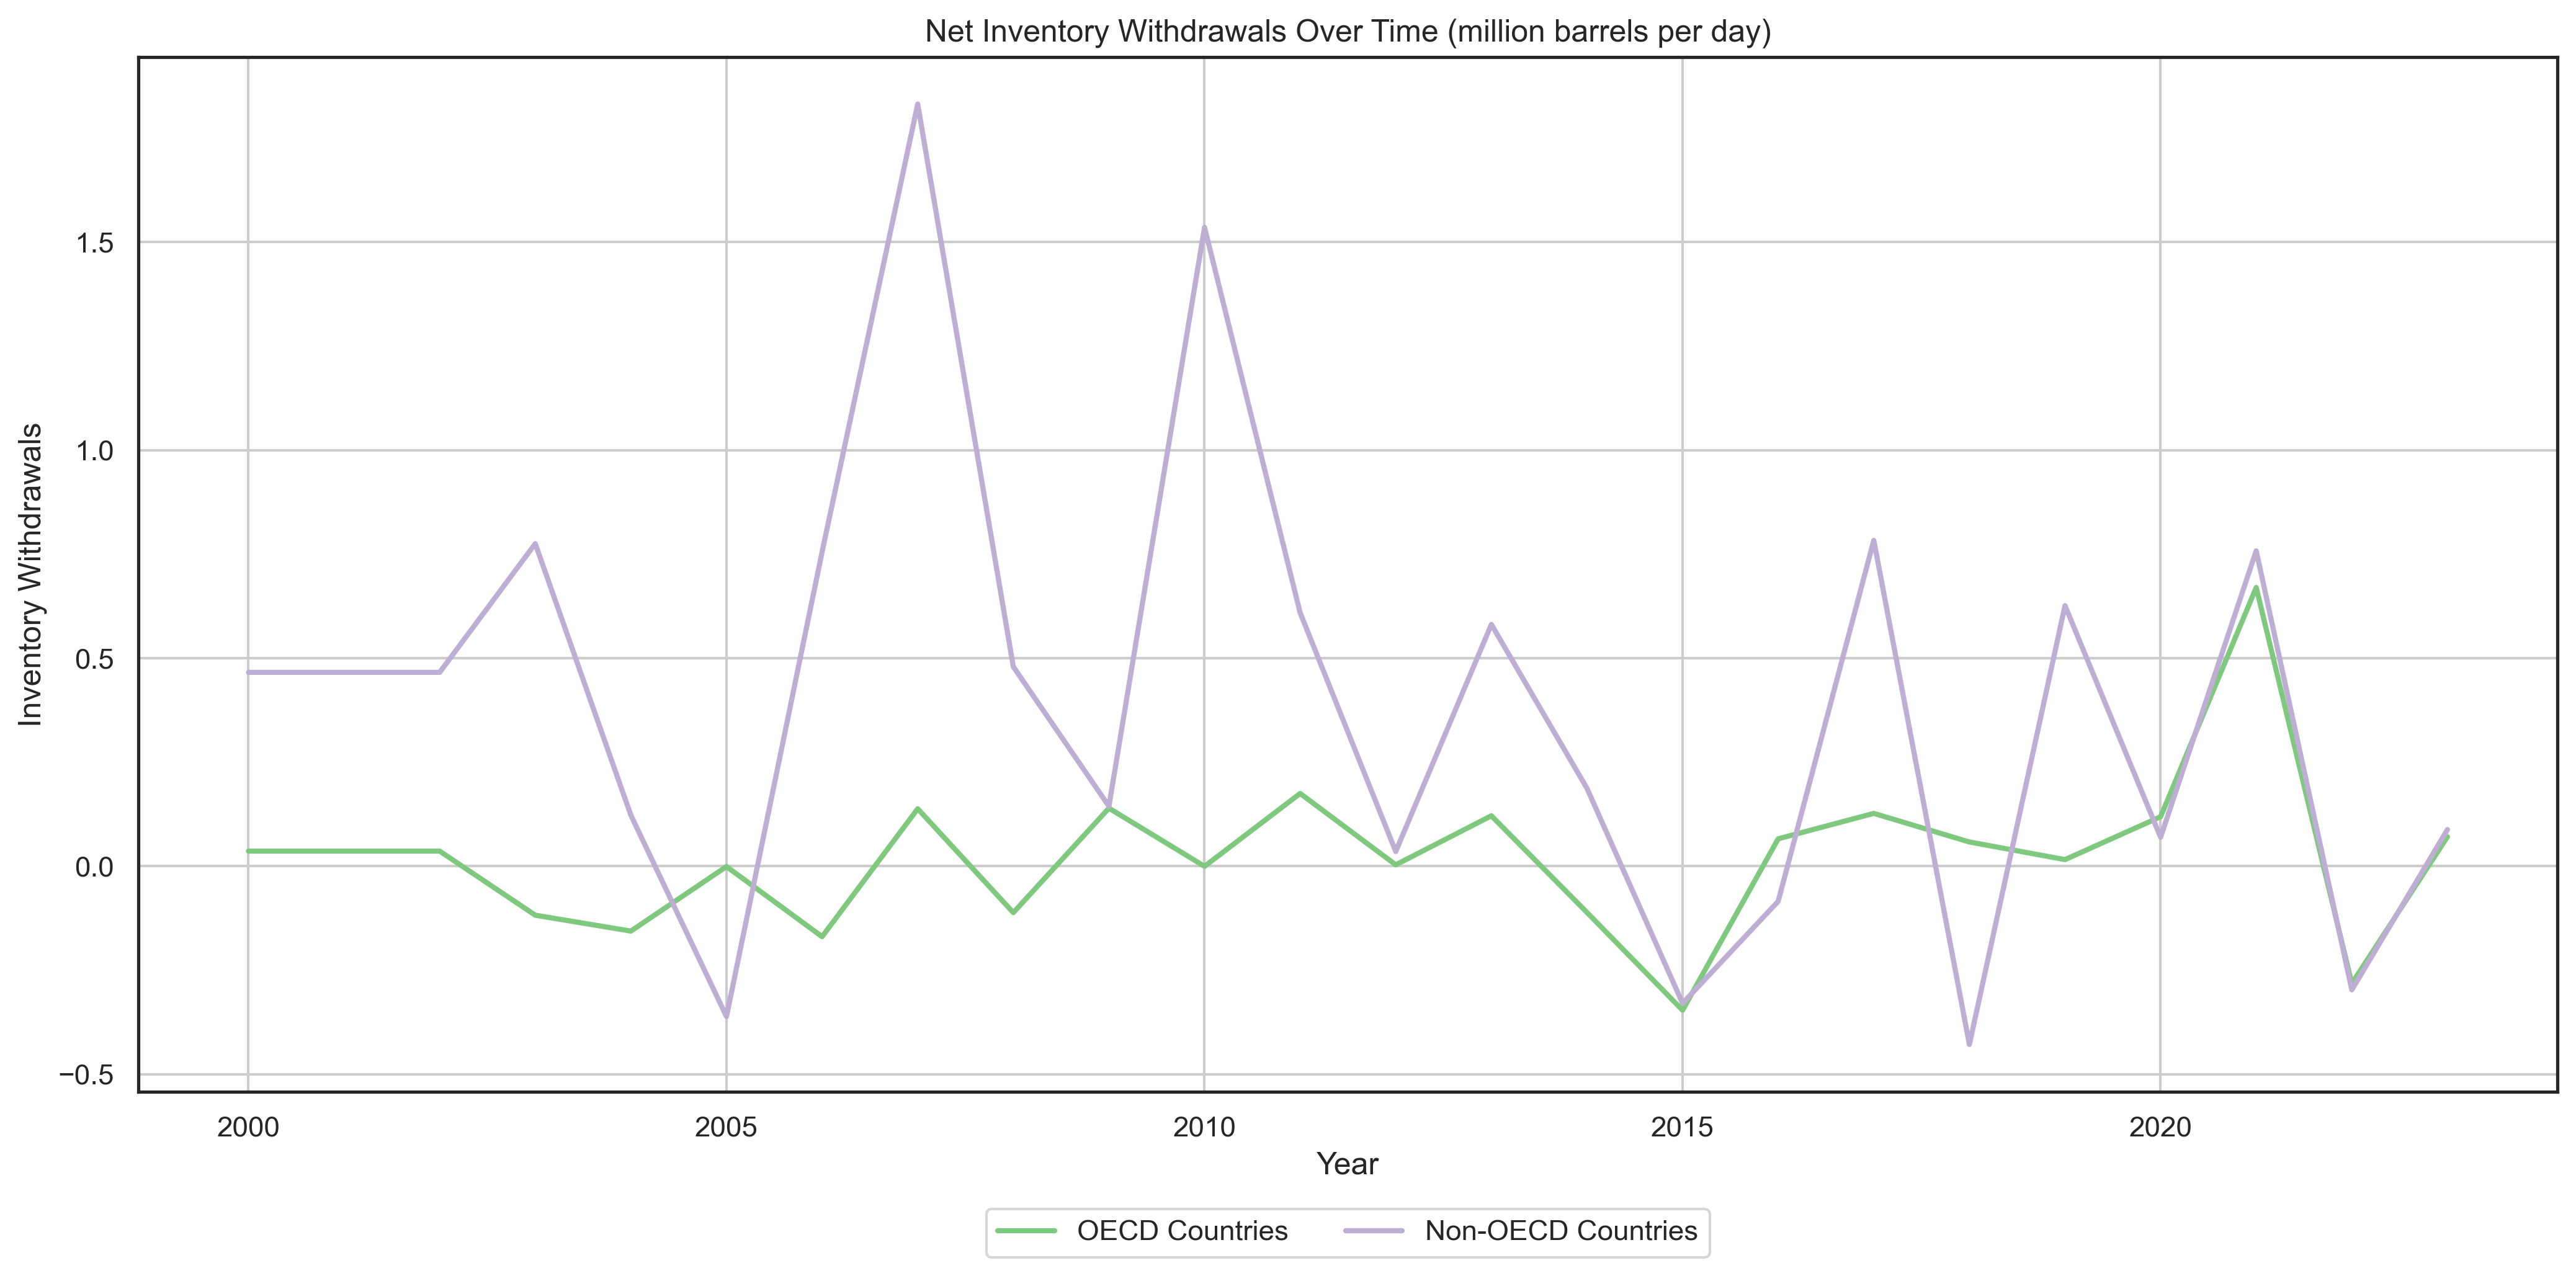

In [65]:
inventory_withdrawals_df = df.melt(id_vars=['year'], value_vars=['T3_STCHANGE_OOECD', 'T3_STCHANGE_NOECD'],
        var_name='Country', value_name='net_inventory_withdrawals')
sns.set_theme(style='white')

plt.figure(figsize=(14, 7), dpi=300)
sns.lineplot(data=inventory_withdrawals_df, x='year', y='net_inventory_withdrawals', hue='Country',  
             palette='Accent', ci=None, linewidth=2)
    
plt.title('Net Inventory Withdrawals Over Time (million barrels per day)')
plt.xlabel('Year')
plt.ylabel('Inventory Withdrawals')
plt.legend(bbox_to_anchor=(0.5, -0.1), loc='upper center', ncol=4, labels=['OECD Countries', 
                                                                           'Non-OECD Countries'])
plt.tight_layout()
plt.grid()
plt.savefig('time-series_plots/net_inventory_withdrawals-over-time.png', bbox_inches='tight')
plt.show()

#### Production Cap

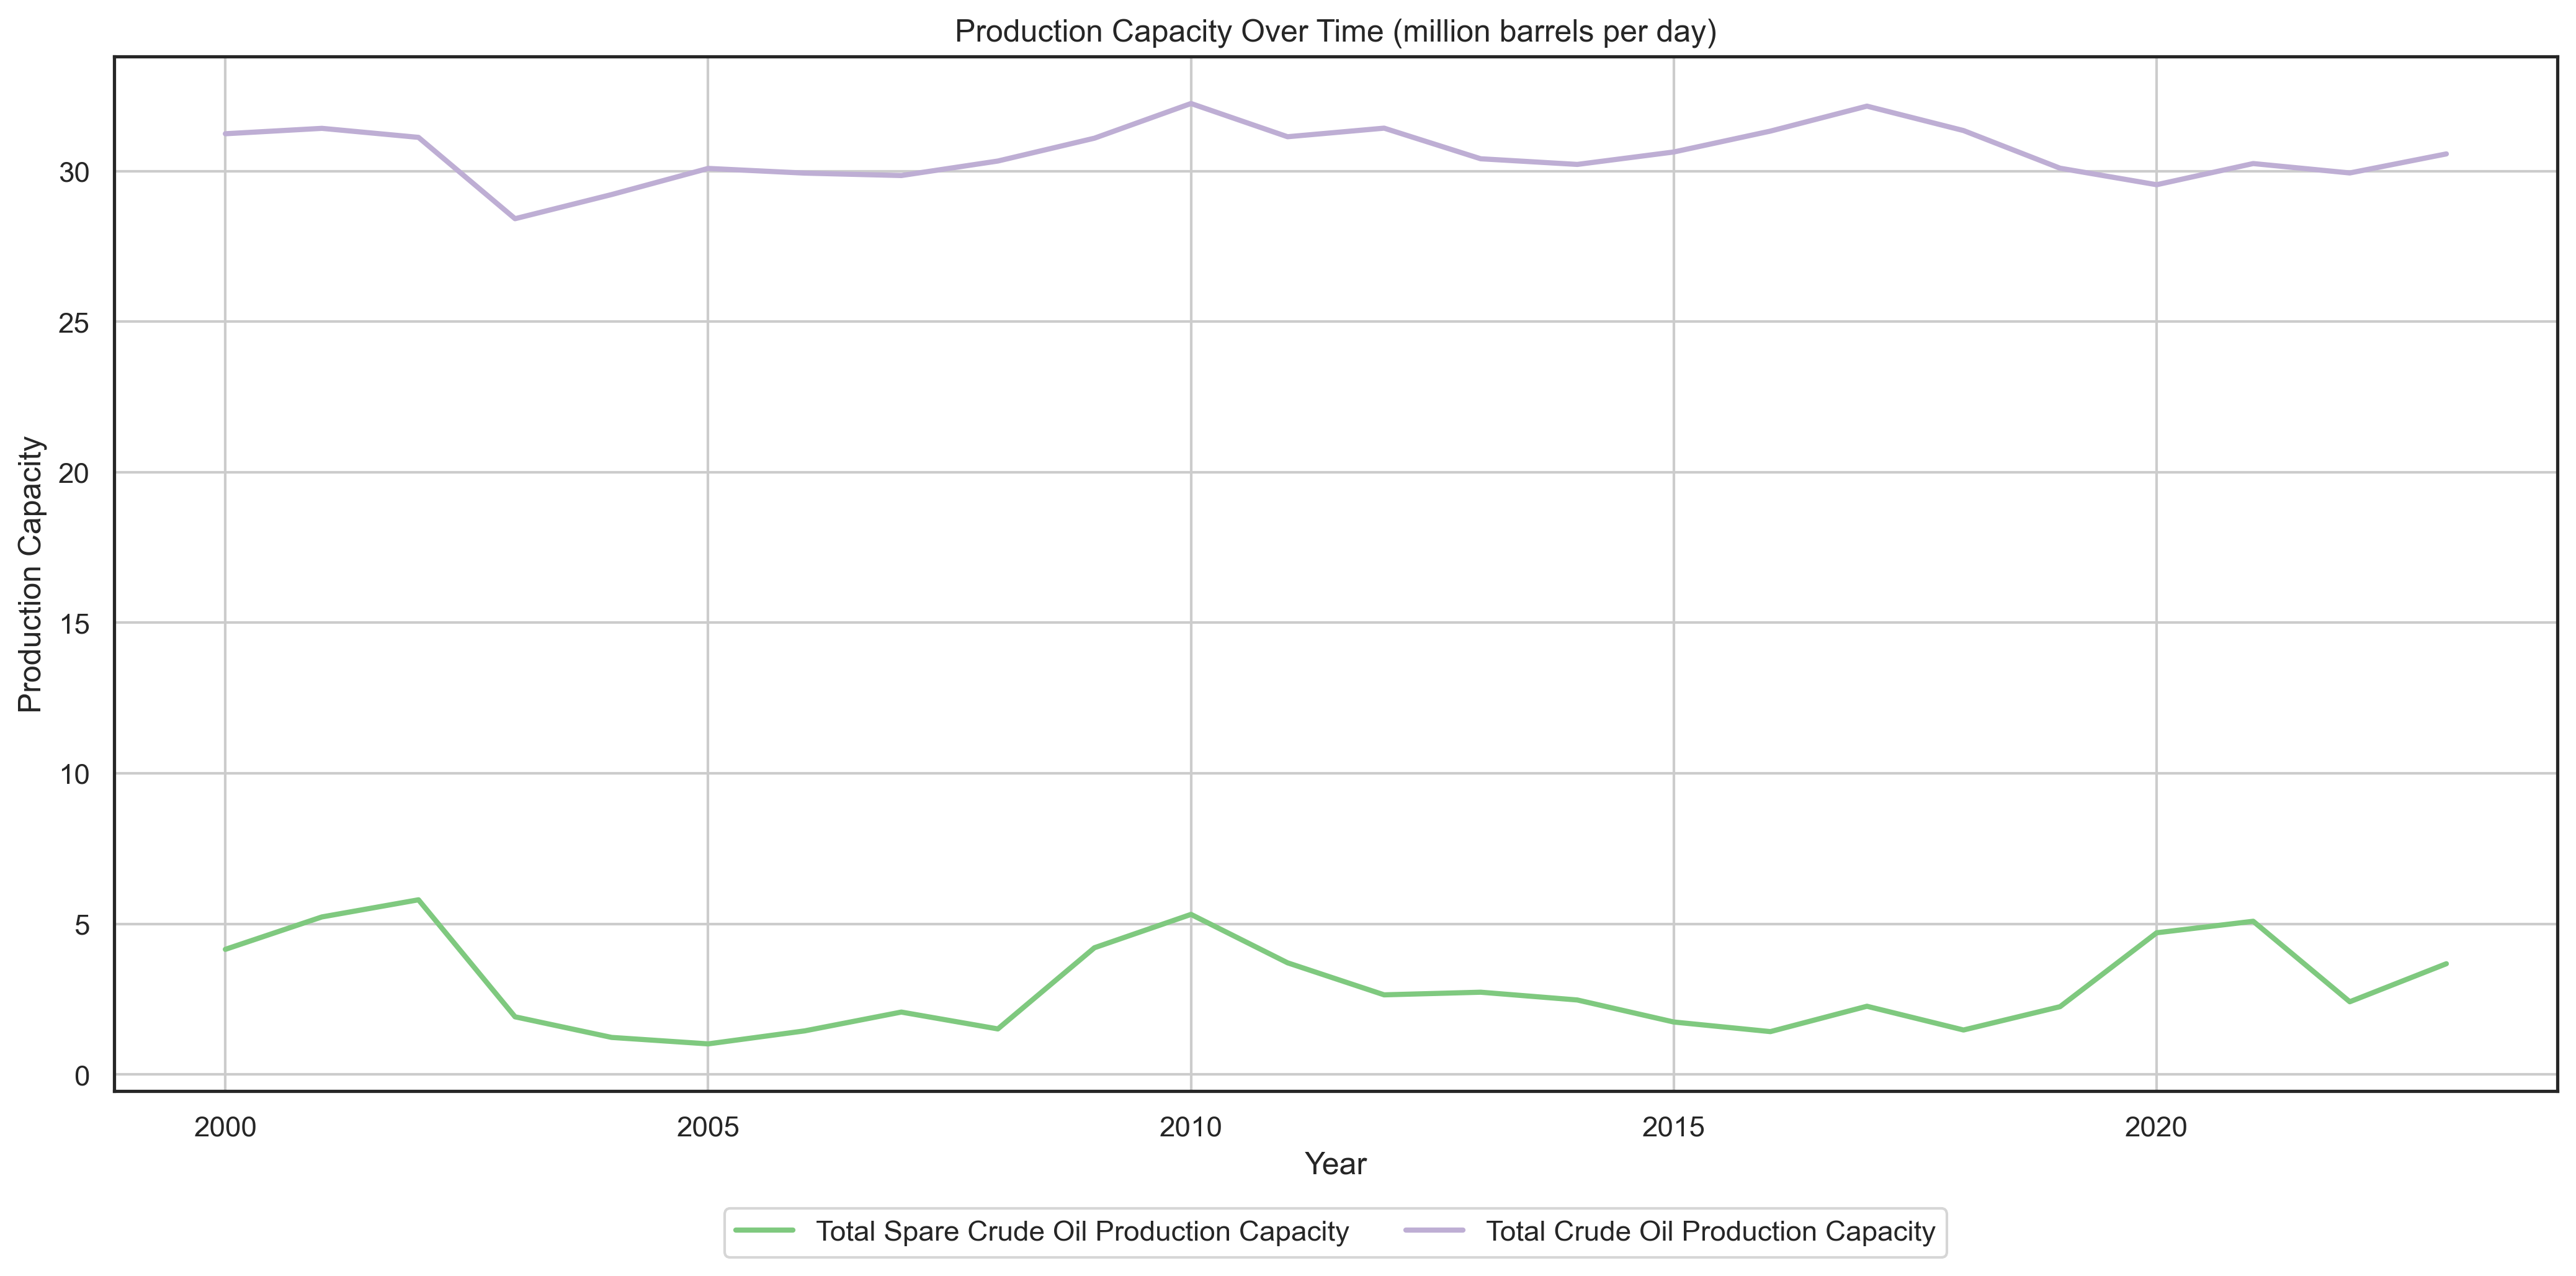

In [63]:
production_capacity_df = df.melt(id_vars=['year'], value_vars=['COPS_OPEC', 'COPC_OPEC'],
        var_name='Country', value_name='production_capacity')
sns.set_theme(style='white')

plt.figure(figsize=(14, 7), dpi=300)
sns.lineplot(data=production_capacity_df, x='year', y='production_capacity', hue='Country',  
             palette='Accent', ci=None, linewidth=2)
    
plt.title('Production Capacity Over Time (million barrels per day)')
plt.xlabel('Year')
plt.ylabel('Production Capacity')
plt.legend(bbox_to_anchor=(0.5, -0.1), loc='upper center', ncol=4, labels=['Total Spare Crude Oil Production Capacity', 
                                                                           'Total Crude Oil Production Capacity'])
plt.tight_layout()
plt.grid()
plt.savefig('time-series_plots/production-capacity-over-time.png', bbox_inches='tight')
plt.show()